In [1]:
import pickle
import matplotlib.pyplot as plt

from loading import load_tuning_results, load_PCA_test_sets
from post_processing import best_PCA, get_training_times, get_training_rand_scores, get_best_estimators, execute_estimators, get_testing_times, get_testing_rand_scores, get_n_clusters_testing, get_labels
from plot import plot_rand_score_vs_PCA, plot_training_time_vs_PCA, plot_clusters, plot_testing_time_vs_PCA, plot_images_per_cluster

PCA_DIMENSIONS = list(range(10,200+10,10))
PCA_DIMENSIONS.insert(0,2)
DATASET_PERC = 0.5

Loading the results of the tuning phase.

In [2]:
normalized_cut = load_tuning_results("NormalizedCut")
normalized_cut

{2: (MySpectralClustring(affinity='nearest_neighbors', assign_labels='discretize',
                      eigen_solver='lobpcg', n_clusters=15, n_jobs=-1,
                      random_state=1),
  {'assign_labels': 'discretize', 'n_clusters': 15},
  0.8453061643660857,
  255.65616393089294),
 10: (MySpectralClustring(affinity='nearest_neighbors', assign_labels='discretize',
                      eigen_solver='lobpcg', n_clusters=15, n_jobs=-1,
                      random_state=1),
  {'assign_labels': 'discretize', 'n_clusters': 15},
  0.8303717117852678,
  123.84478306770325),
 20: (MySpectralClustring(affinity='nearest_neighbors', assign_labels='discretize',
                      eigen_solver='lobpcg', n_clusters=14, n_jobs=-1,
                      random_state=1),
  {'assign_labels': 'discretize', 'n_clusters': 14},
  0.8308056923430204,
  98.7687029838562),
 30: (MySpectralClustring(affinity='nearest_neighbors', assign_labels='discretize',
                      eigen_solver='lobpcg'

Now we search for the PCA dimension corresponding to the best rand score.

Recall: spectral_clustering is a dictionary in the following form:
- the keys are the values of the PCA dimension;
- the values are tuples containing (best estimator, Dict['assign_labels' : value, 'n_clusters' : value], rand score, training time).

In [3]:
best_PCA(normalized_cut)

The best PCA dimension is 200, with hyperparameters =  {'assign_labels': 'discretize', 'n_clusters': 13}


In [4]:
training_rand_scores = get_training_rand_scores(normalized_cut)
training_rand_scores

[0.8453061643660857,
 0.8303717117852678,
 0.8308056923430204,
 0.8344747148725539,
 0.8343145332074606,
 0.8338929655805882,
 0.8343845839818333,
 0.8332271961829918,
 0.8342134947567168,
 0.8335901181333402,
 0.8333237695506851,
 0.83521730921338,
 0.8333182711198429,
 0.8346593141632435,
 0.8345592325160105,
 0.8341406246013318,
 0.8364993238588523,
 0.8342185084071134,
 0.8329876763707805,
 0.8350460286275612,
 0.9254324496721352]

In [5]:
training_times = get_training_times(normalized_cut)
training_times

[255.65616393089294,
 123.84478306770325,
 98.7687029838562,
 119.16097593307495,
 102.95646381378174,
 105.67290902137756,
 116.35408878326416,
 117.07576203346252,
 121.28044581413269,
 120.01932096481323,
 132.16367411613464,
 133.34987592697144,
 146.8681058883667,
 143.44600009918213,
 165.5858860015869,
 157.89570379257202,
 166.94906425476074,
 212.6850230693817,
 171.1865861415863,
 178.0304090976715,
 172.45653200149536]

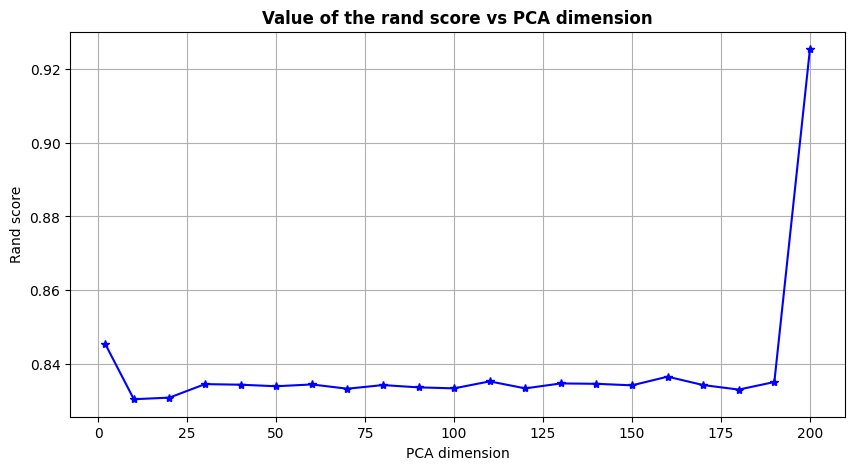

In [6]:
plot_rand_score_vs_PCA(PCA_DIMENSIONS, training_rand_scores, "train", "NormalizedCut")

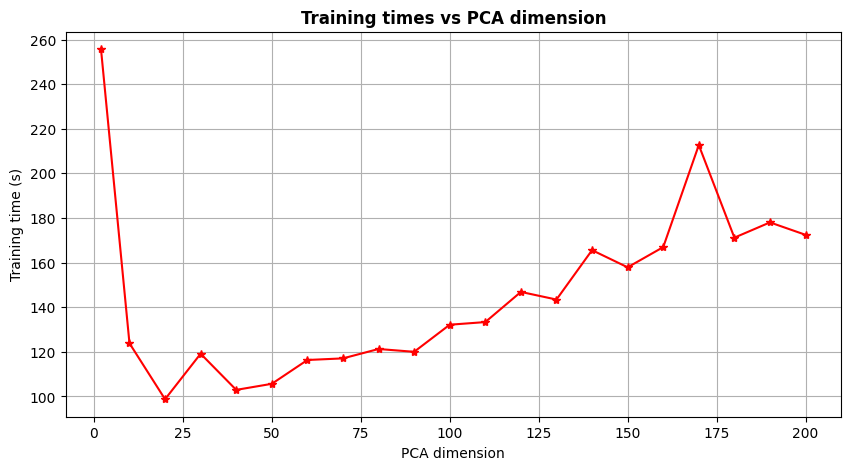

In [7]:
plot_training_time_vs_PCA(PCA_DIMENSIONS, training_times, "NormalizedCut")

In [8]:
best_estimators = get_best_estimators(normalized_cut)

In [9]:
testing_results = execute_estimators(best_estimators, "NormalizedCut", PCA_DIMENSIONS, DATASET_PERC)
testing_results

Executing NormalizedCut ..: 100%|██████████| 21/21 [09:49<00:00, 28.09s/it]


{2: (0.8458370379441961,
  49.21242904663086,
  15,
  array([13, 13, 12, ..., 13,  5, 14])),
 10: (0.8269668319964076,
  23.67584204673767,
  15,
  array([10,  7, 14, ...,  2,  0,  5])),
 20: (0.8331224868858816,
  23.65870499610901,
  14,
  array([ 1,  2,  8, ..., 11,  1,  8])),
 30: (0.8327277366154349,
  19.305077075958252,
  15,
  array([10, 10, 13, ...,  5,  0,  4])),
 40: (0.8331880472720593,
  20.60987901687622,
  15,
  array([12,  5,  1, ..., 10,  5,  9])),
 50: (0.8331872716510522,
  26.202059030532837,
  15,
  array([14, 12, 13, ...,  9,  2,  2])),
 60: (0.8360928704100585,
  26.354499101638794,
  15,
  array([3, 7, 7, ..., 6, 7, 4])),
 70: (0.8322085195844304,
  27.448358297348022,
  15,
  array([ 6, 13,  8, ..., 12,  4, 11])),
 80: (0.8349680566611557,
  28.706971883773804,
  15,
  array([ 7,  9, 13, ..., 11, 12,  2])),
 90: (0.8363249035576511,
  30.368762731552124,
  15,
  array([ 9,  0, 10, ..., 13, 14,  6])),
 100: (0.8356971404078134,
  27.57394003868103,
  15,
  array

In [10]:
testing_rand_scores = get_testing_rand_scores(testing_results)
testing_rand_scores

[0.8458370379441961,
 0.8269668319964076,
 0.8331224868858816,
 0.8327277366154349,
 0.8331880472720593,
 0.8331872716510522,
 0.8360928704100585,
 0.8322085195844304,
 0.8349680566611557,
 0.8363249035576511,
 0.8356971404078134,
 0.833630559467679,
 0.8354546976098627,
 0.8367816626865062,
 0.8332113975465882,
 0.8335881860673974,
 0.8351039944481865,
 0.8359761190374135,
 0.835722572612414,
 0.8317059579939992,
 0.9317953993427632]

In [11]:
testing_times = get_testing_times(testing_results)
testing_times

[49.21242904663086,
 23.67584204673767,
 23.65870499610901,
 19.305077075958252,
 20.60987901687622,
 26.202059030532837,
 26.354499101638794,
 27.448358297348022,
 28.706971883773804,
 30.368762731552124,
 27.57394003868103,
 31.844372987747192,
 25.203460693359375,
 26.99797797203064,
 28.024277925491333,
 33.27722120285034,
 33.83930587768555,
 28.835649013519287,
 29.759876012802124,
 26.503933906555176,
 22.365830898284912]

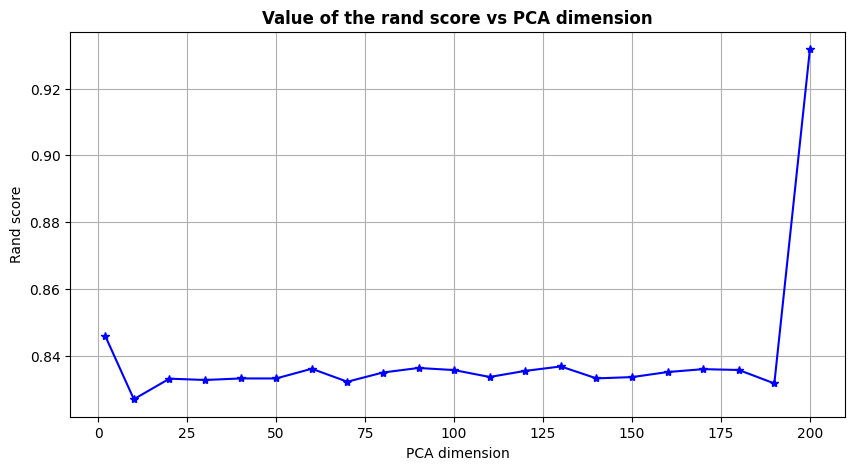

In [12]:
plot_rand_score_vs_PCA(PCA_DIMENSIONS, testing_rand_scores, "test", "NormalizedCut")

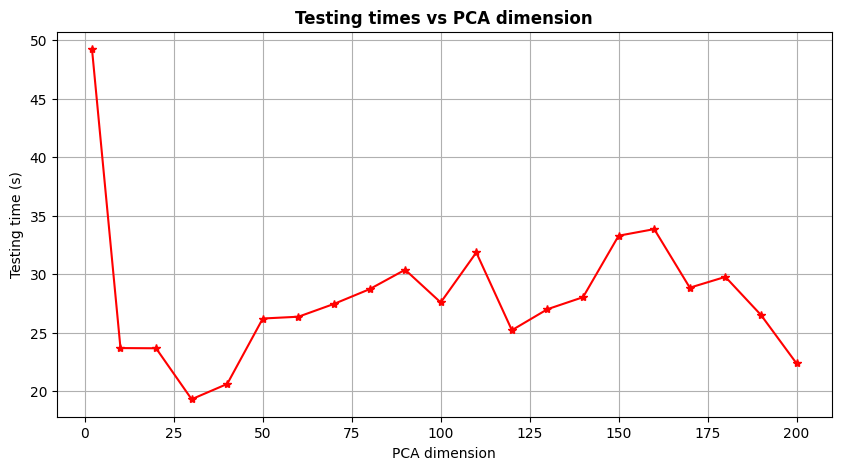

In [13]:
plot_testing_time_vs_PCA(PCA_DIMENSIONS, testing_times, "NormalizedCut")

In [14]:
labels = get_labels(testing_results)
labels

[array([13, 13, 12, ..., 13,  5, 14]),
 array([10,  7, 14, ...,  2,  0,  5]),
 array([ 1,  2,  8, ..., 11,  1,  8]),
 array([10, 10, 13, ...,  5,  0,  4]),
 array([12,  5,  1, ..., 10,  5,  9]),
 array([14, 12, 13, ...,  9,  2,  2]),
 array([3, 7, 7, ..., 6, 7, 4]),
 array([ 6, 13,  8, ..., 12,  4, 11]),
 array([ 7,  9, 13, ..., 11, 12,  2]),
 array([ 9,  0, 10, ..., 13, 14,  6]),
 array([ 4, 12,  3, ..., 11,  6,  6]),
 array([11,  3,  4, ..., 11, 13,  6]),
 array([14, 13,  8, ...,  5, 10,  8]),
 array([11,  7,  8, ..., 10, 10, 11]),
 array([13,  3, 11, ..., 10,  2,  4]),
 array([ 7,  4,  1, ...,  7, 12, 12]),
 array([13, 11, 11, ..., 10,  1,  2]),
 array([ 0,  0,  6, ..., 13, 12, 13]),
 array([ 9,  3,  3, ..., 12,  5,  7]),
 array([10,  2,  7, ...,  7,  6,  4]),
 array([12,  5,  8, ...,  7,  6,  5])]

In [15]:
n_clusters = get_n_clusters_testing(testing_results)
n_clusters

[15,
 15,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 13]

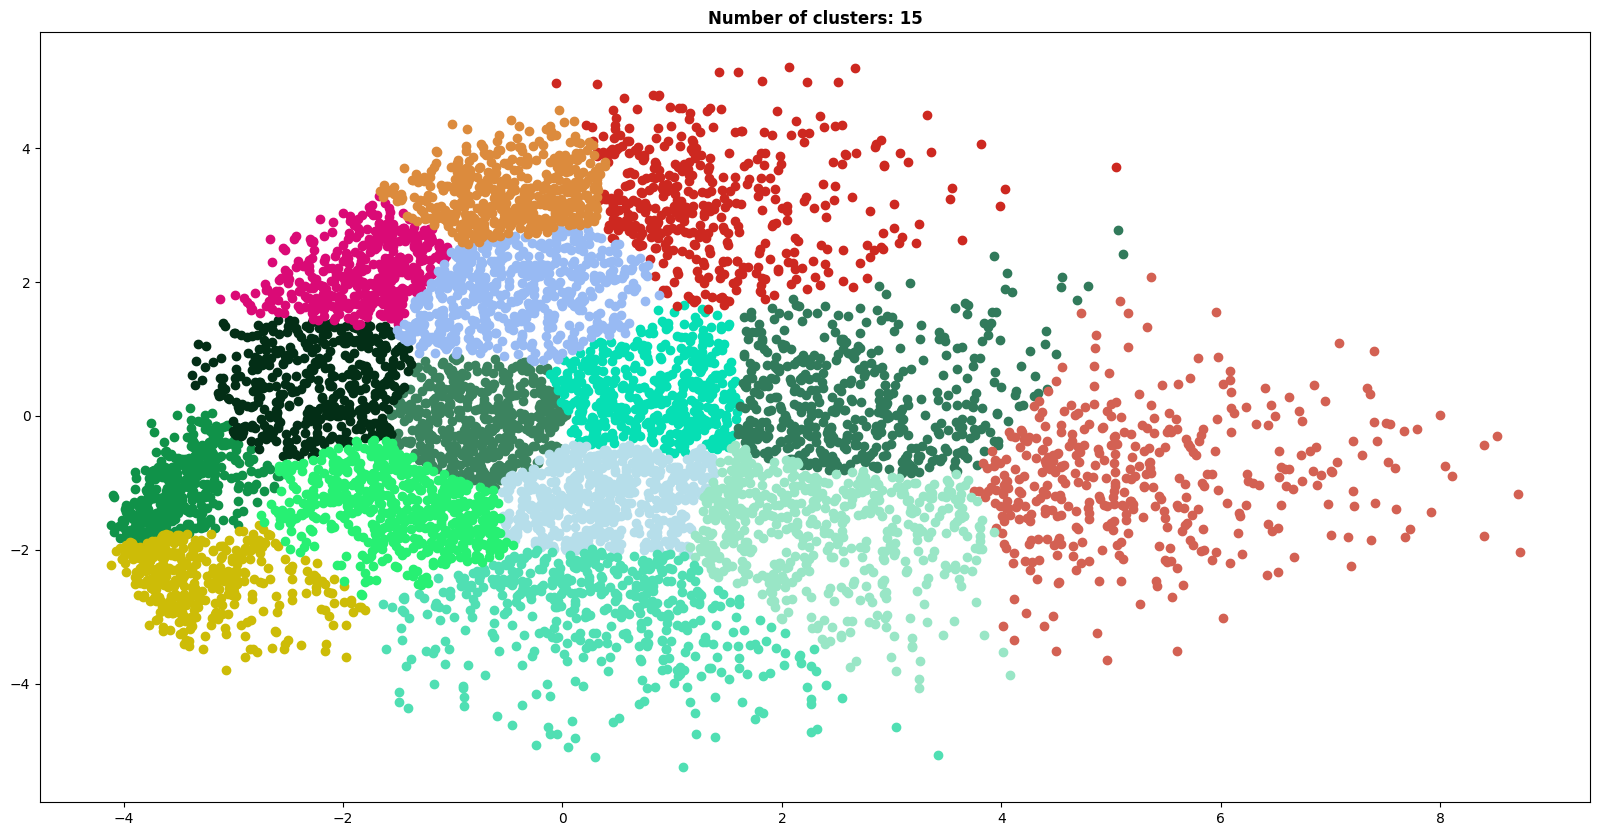

In [16]:
plot_clusters(DATASET_PERC, n_clusters[0], labels[0], "NormalizedCut")

Plotting images of PCA 2..: 100%|██████████| 15/15 [00:00<00:00, 212.43it/s]
/Users/nicolaaggio/Desktop/UNI/Clustering/plot.py:134: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
Plotting images of PCA 190..: 100%|██████████| 15/15 [00:00<00:00, 159.12it/s]
/Users/nicolaaggio/Desktop/UNI/Clustering/plot.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axs = plt.subplots(n_clusters, 4, figsize = (4*2, n_clusters*2))
Plotting images of PCA 200..: 100%|██████████| 13/13 [00:00<00:00, 136.21it/s]


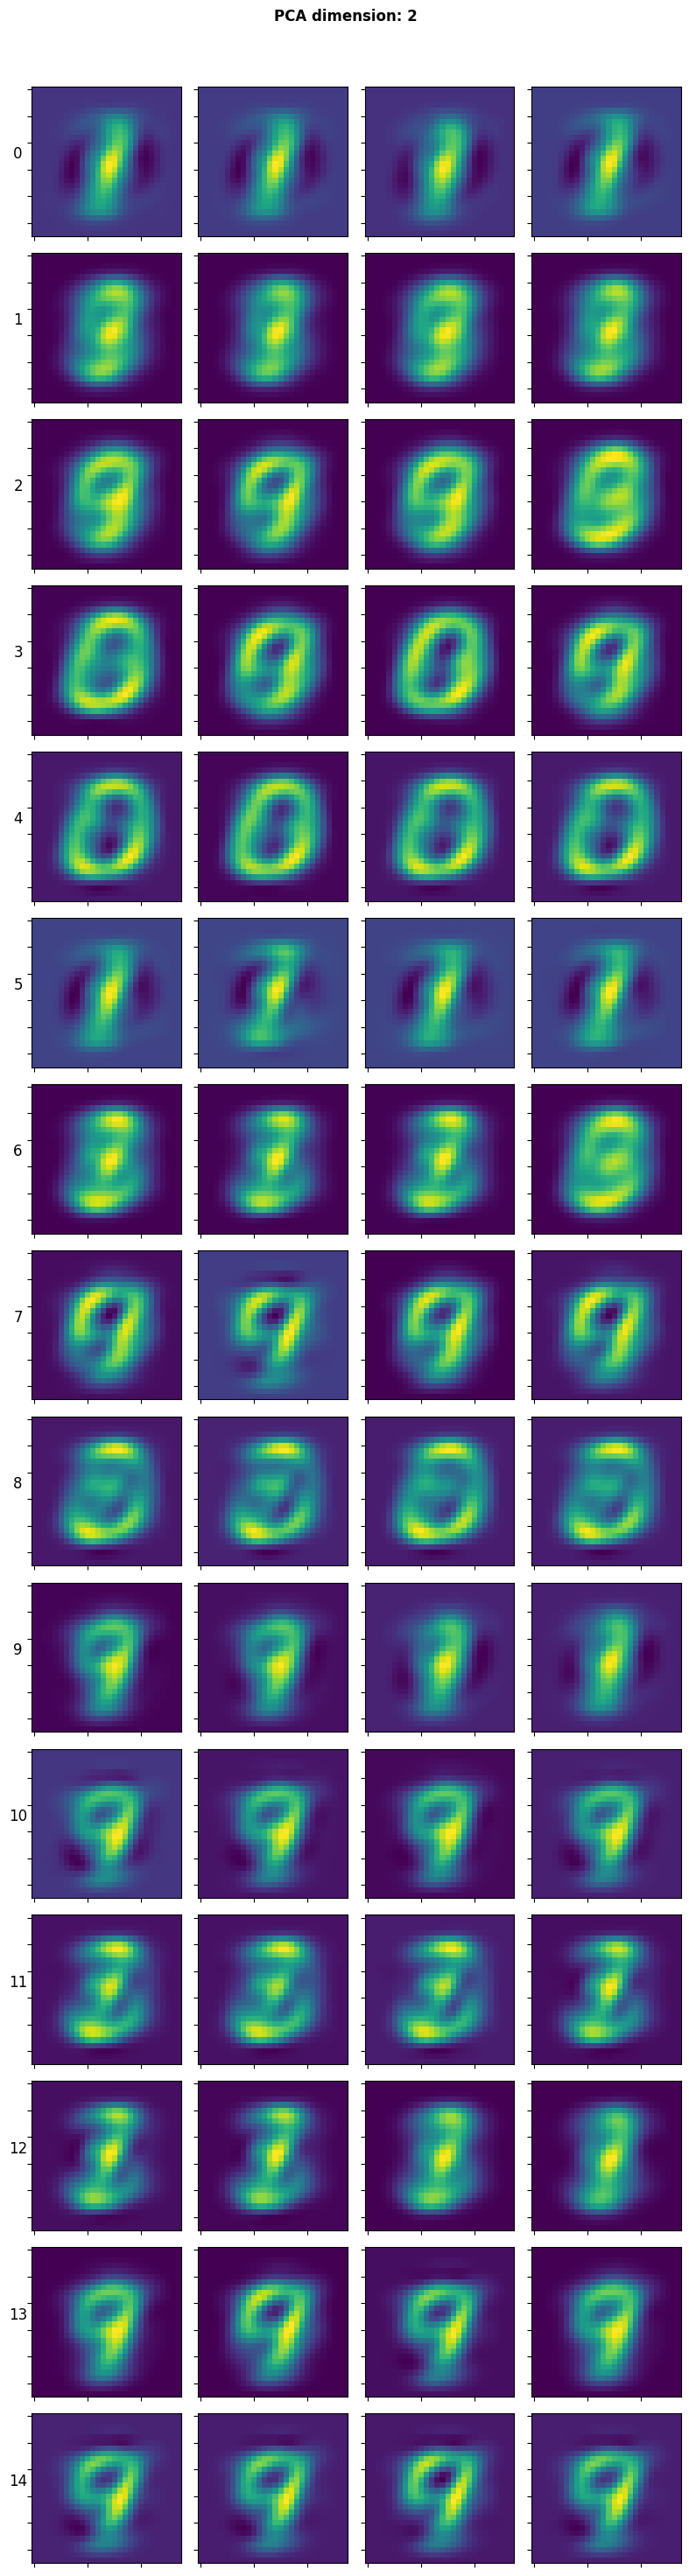

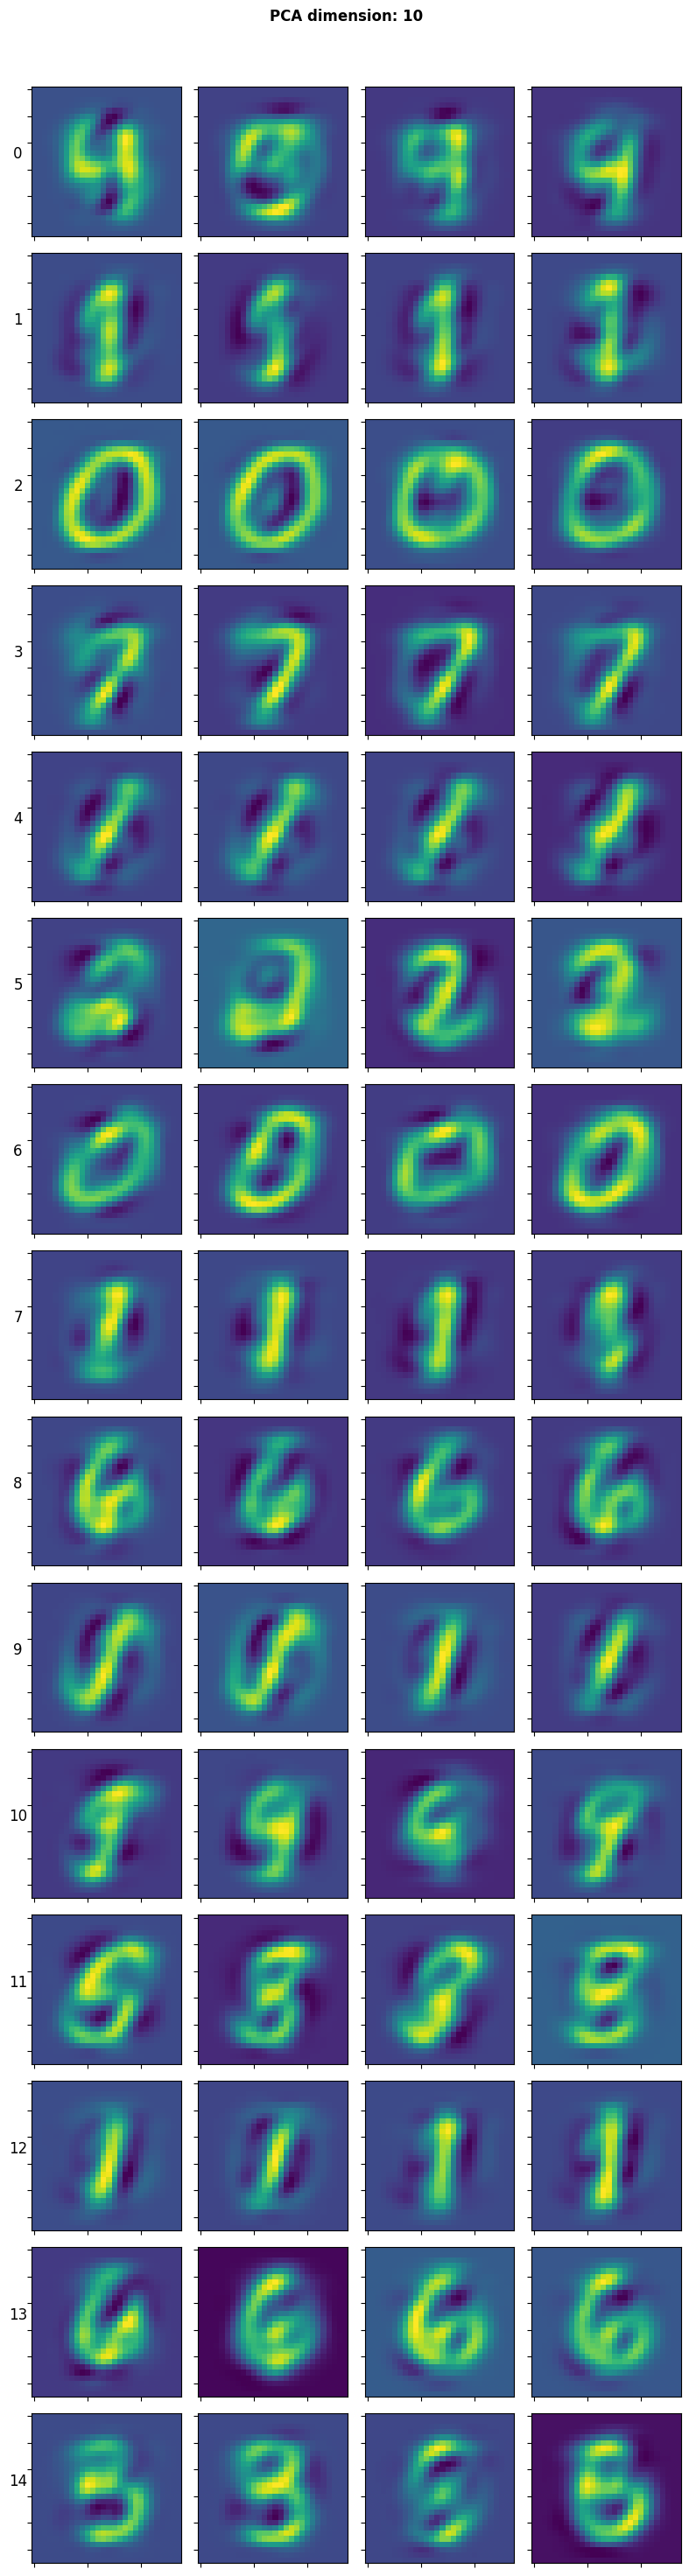

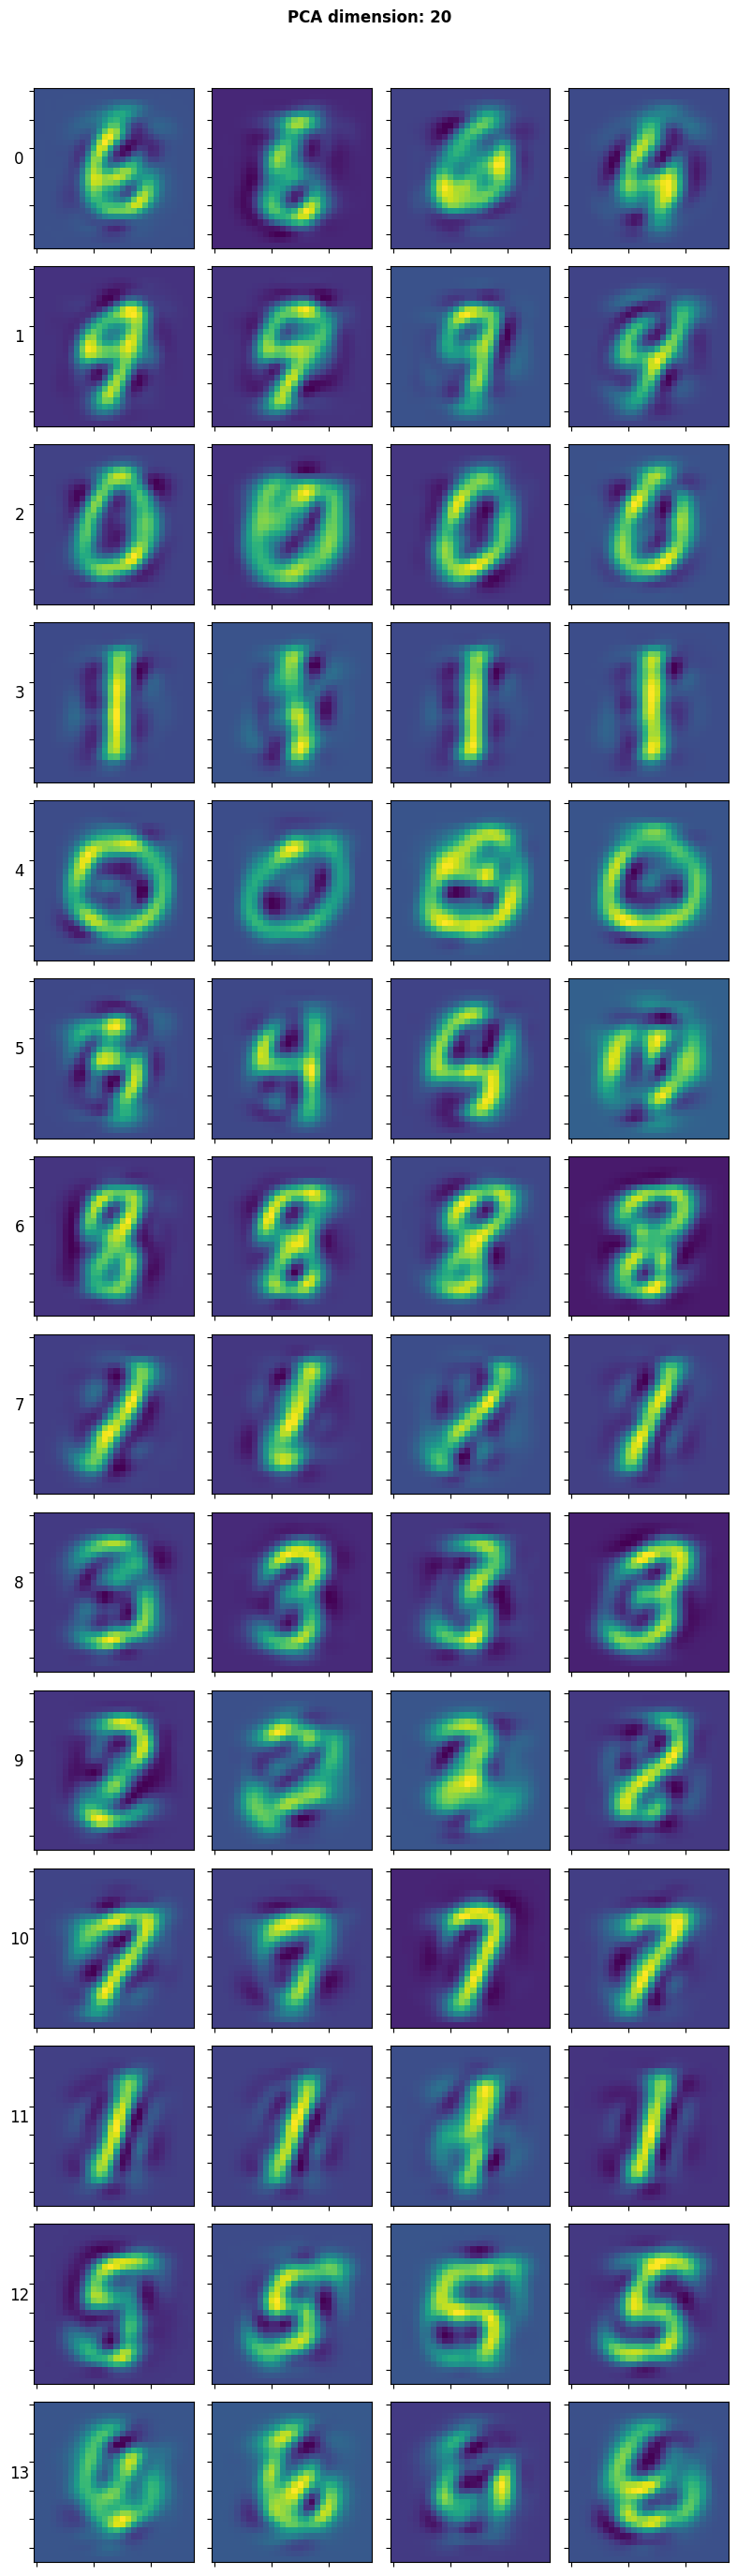

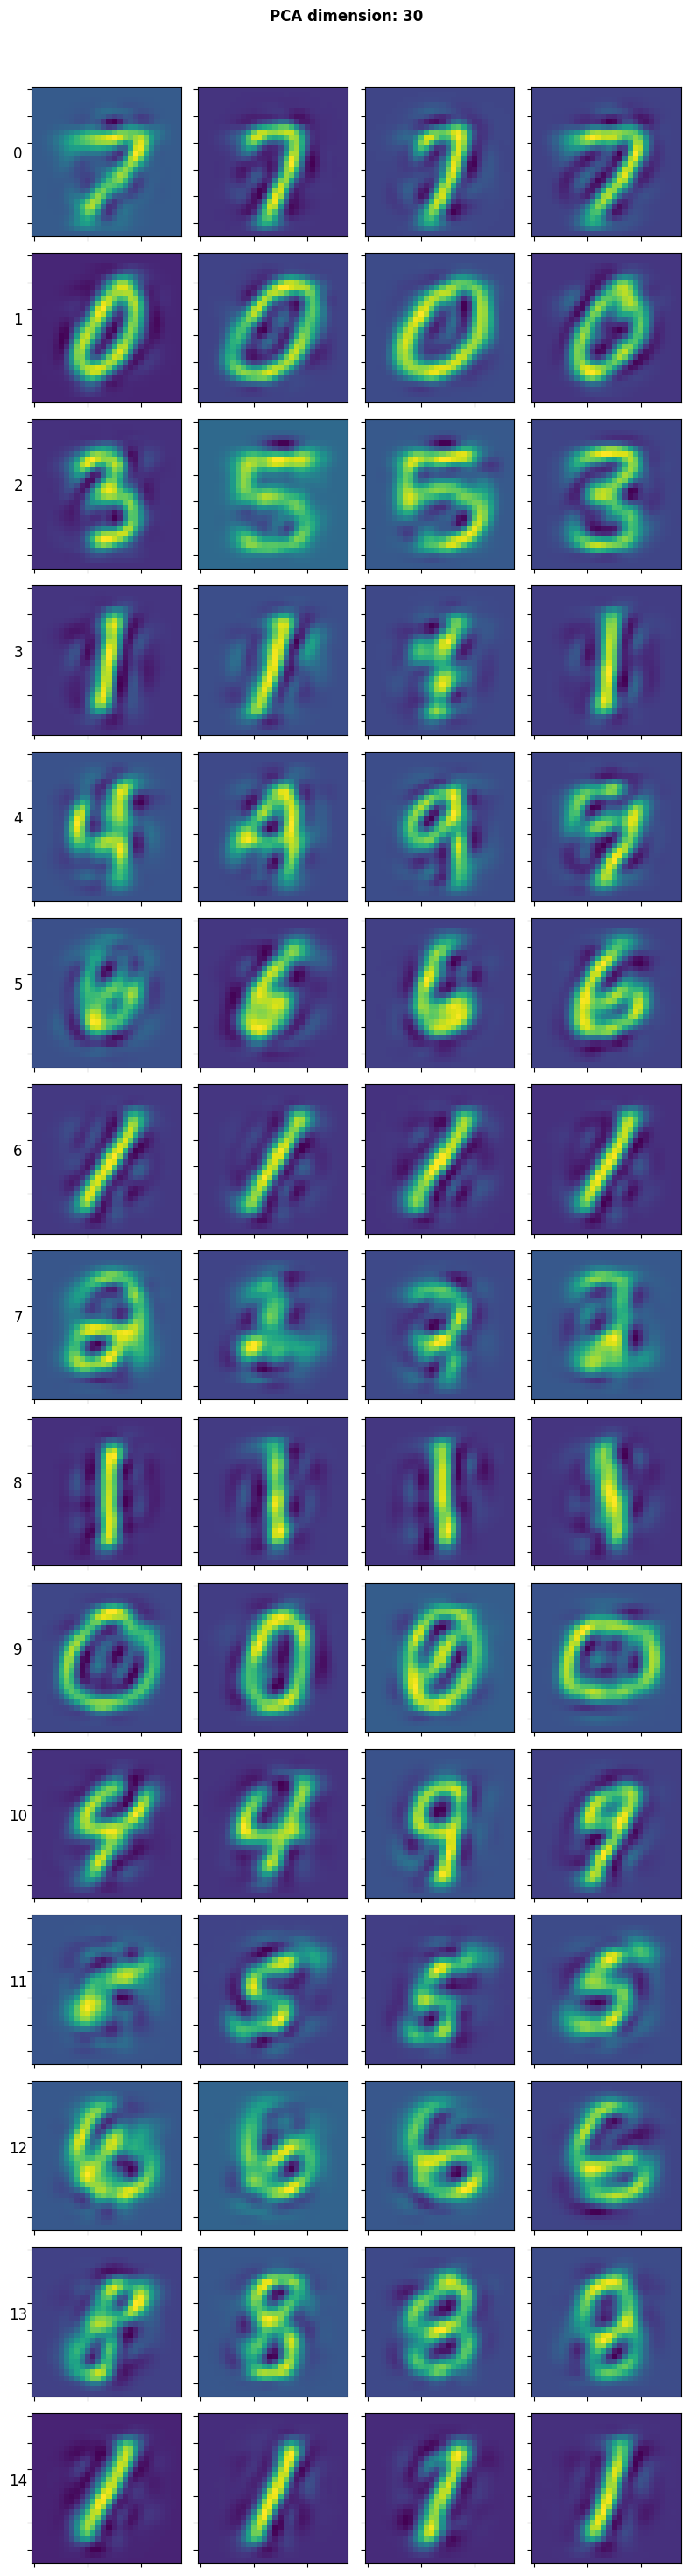

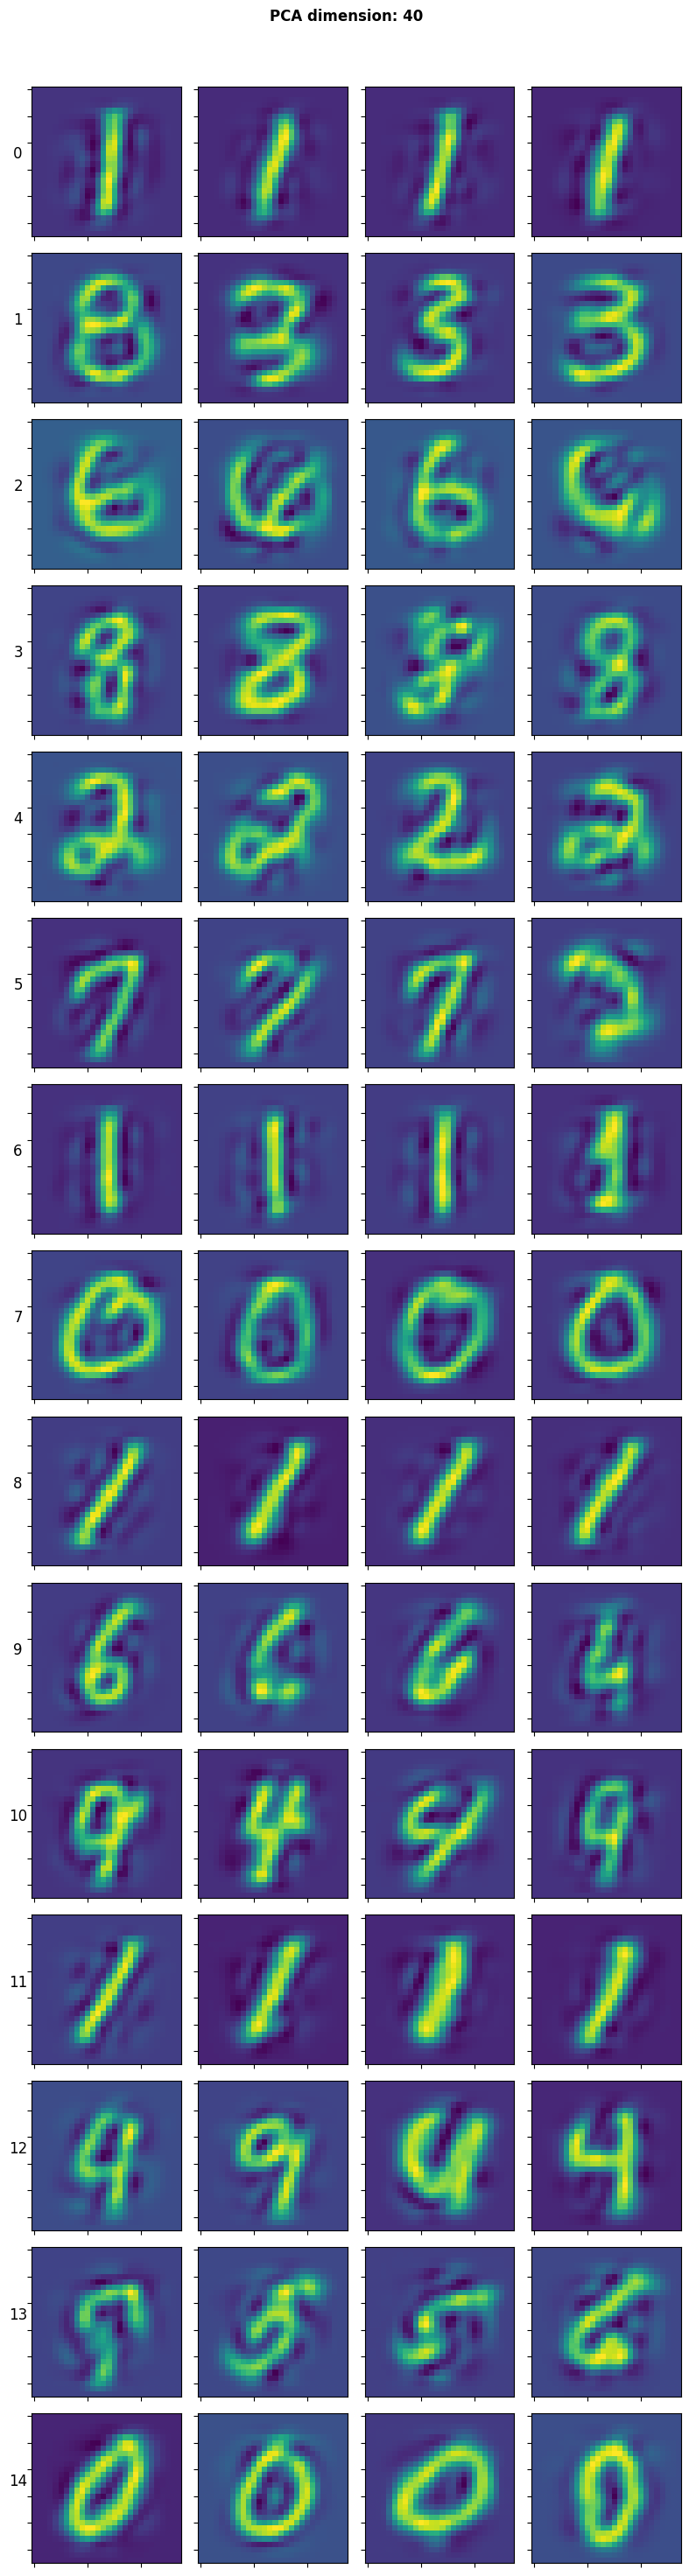

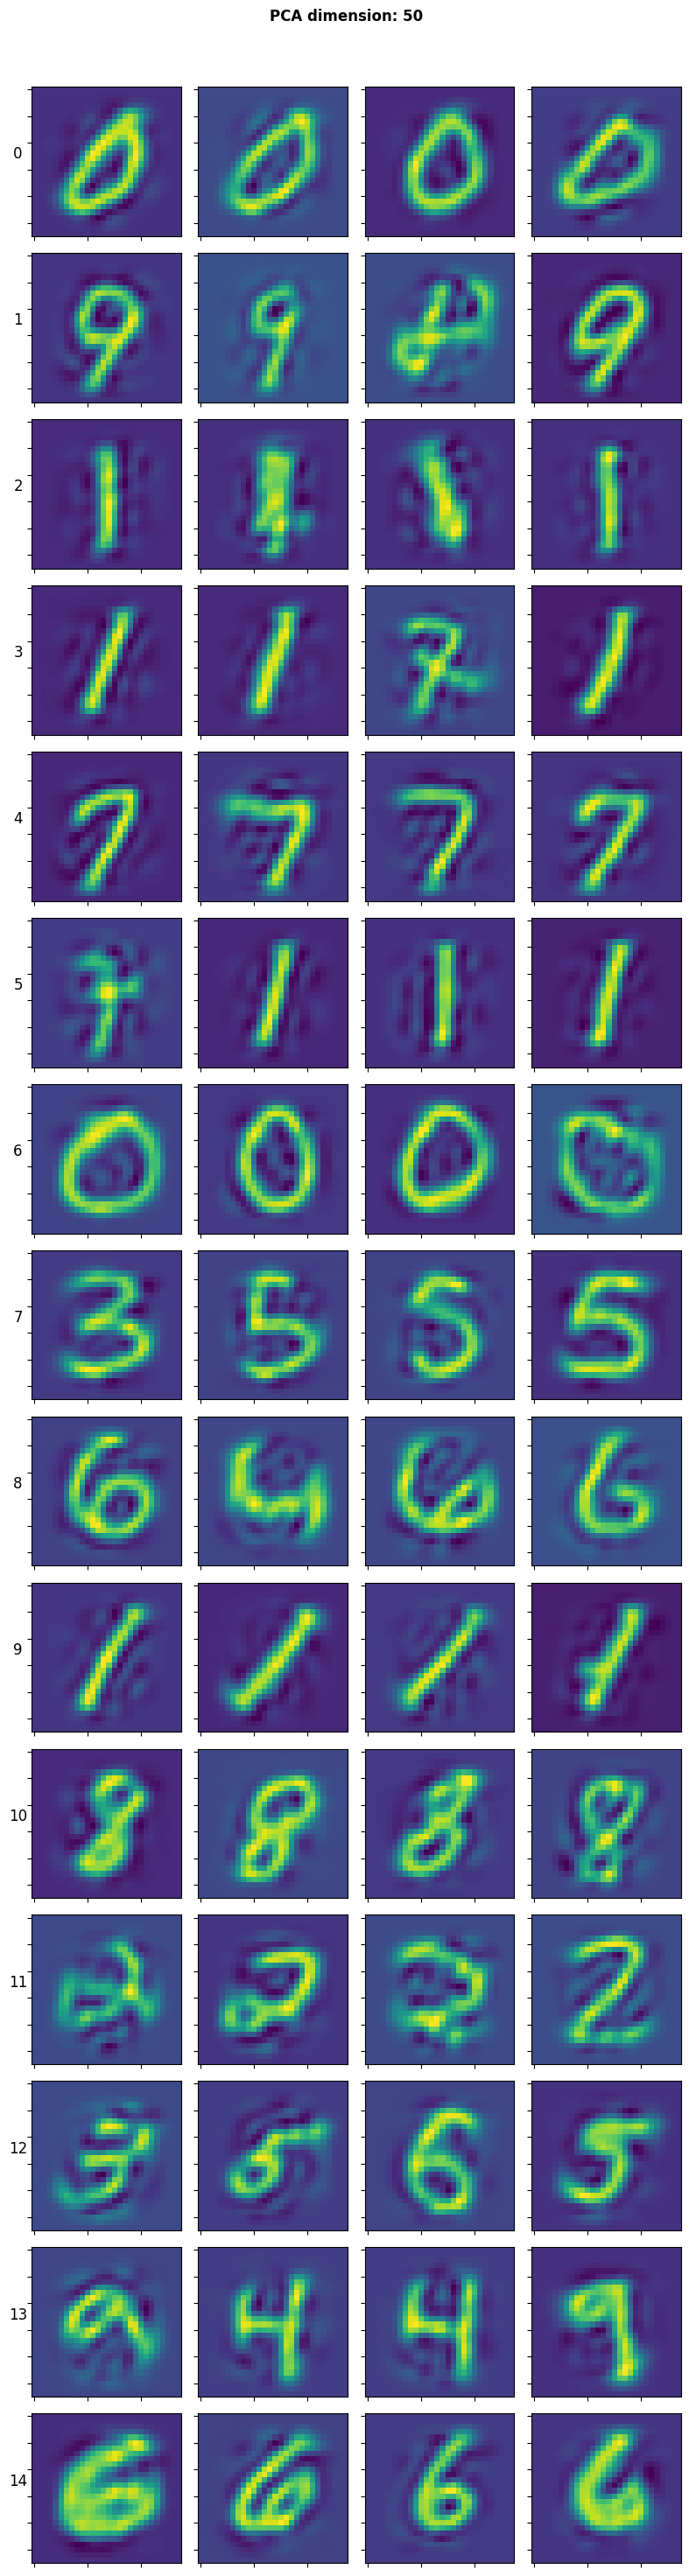

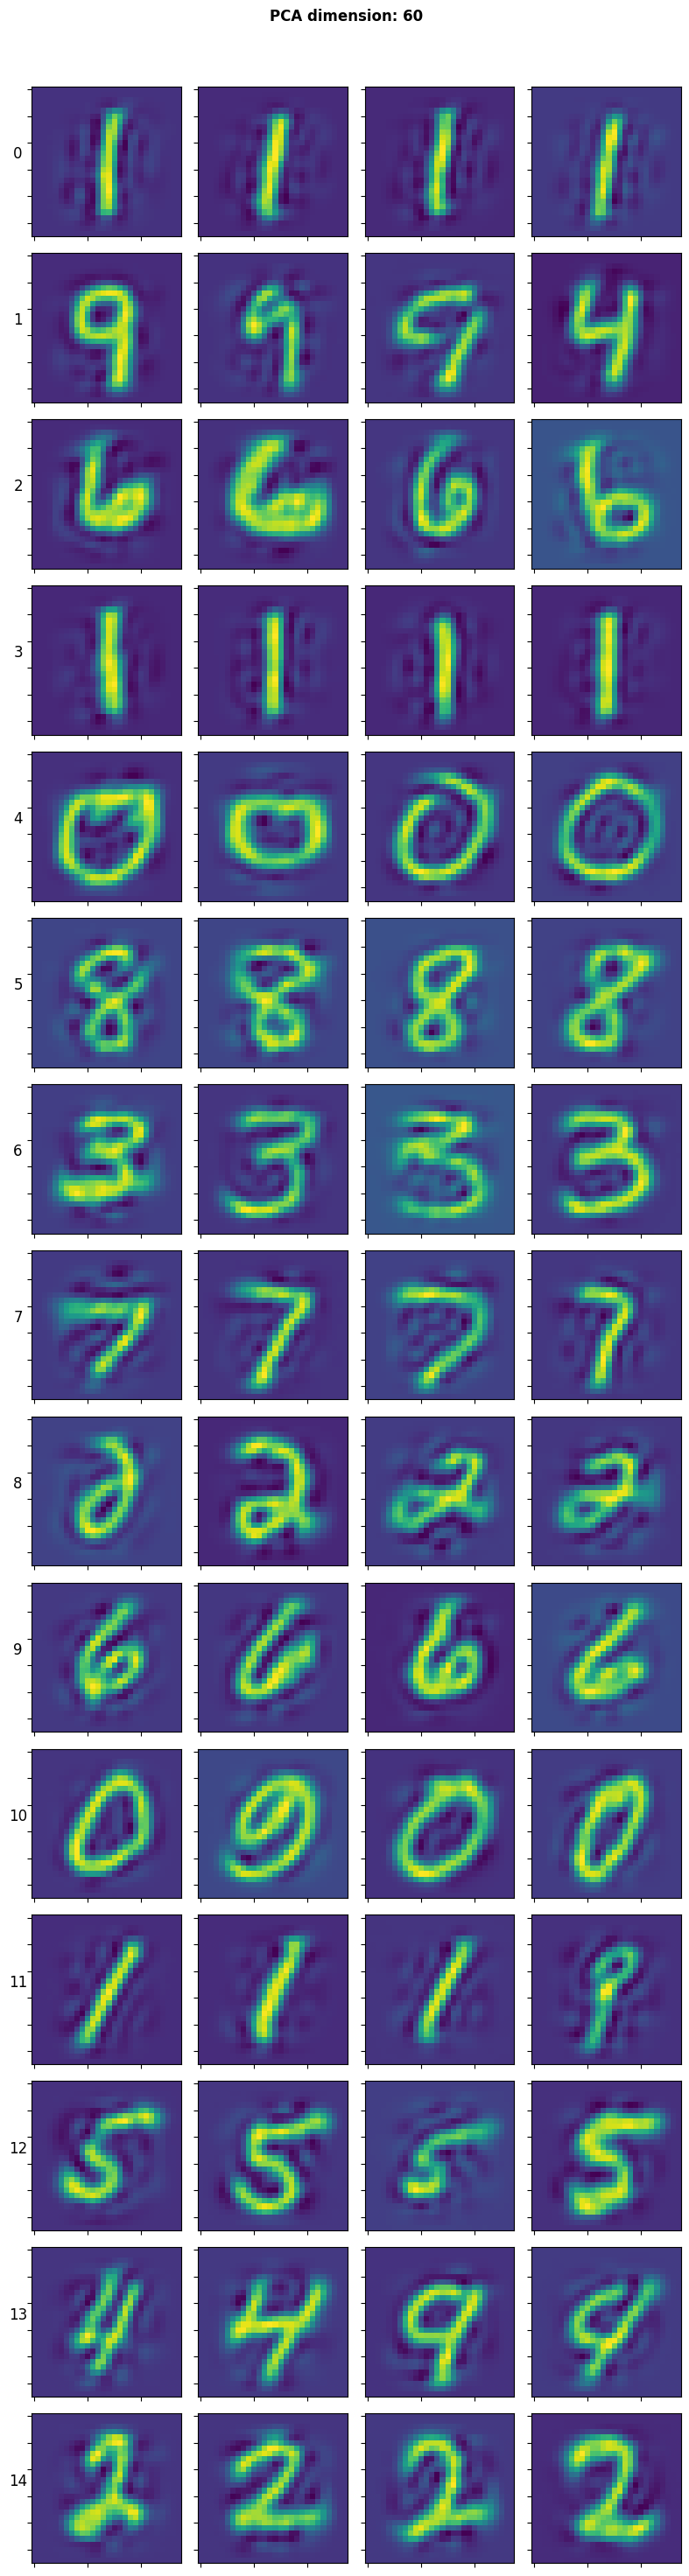

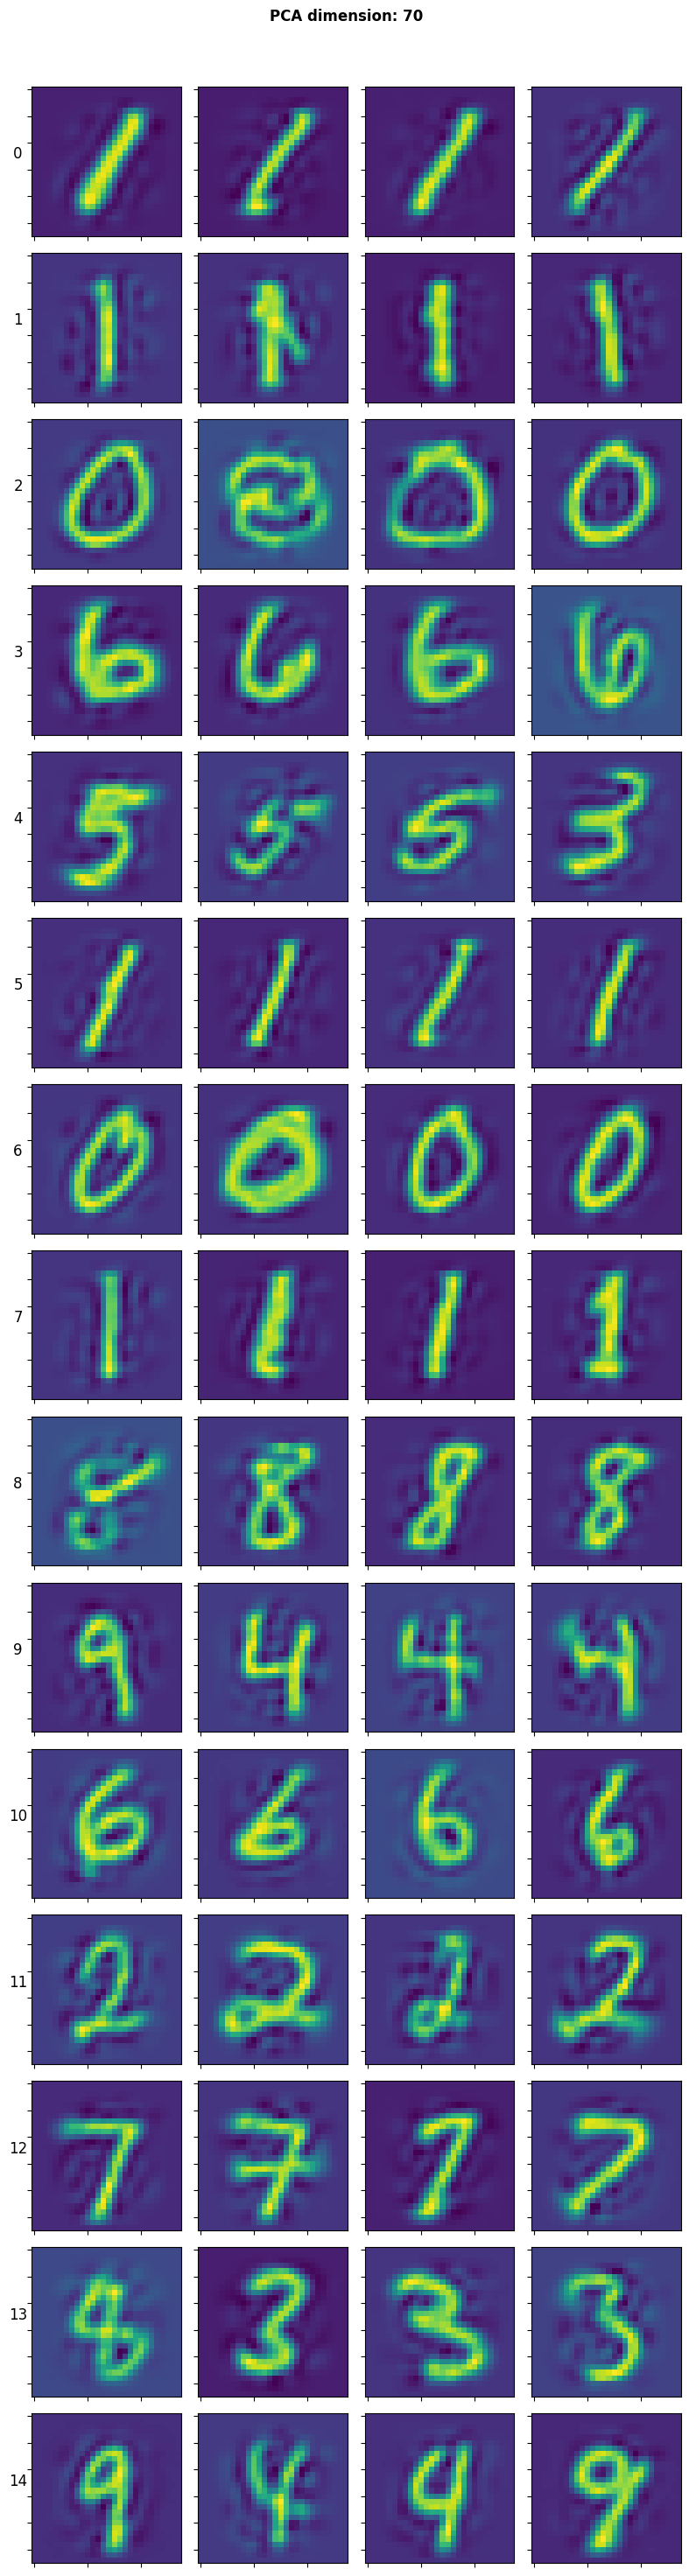

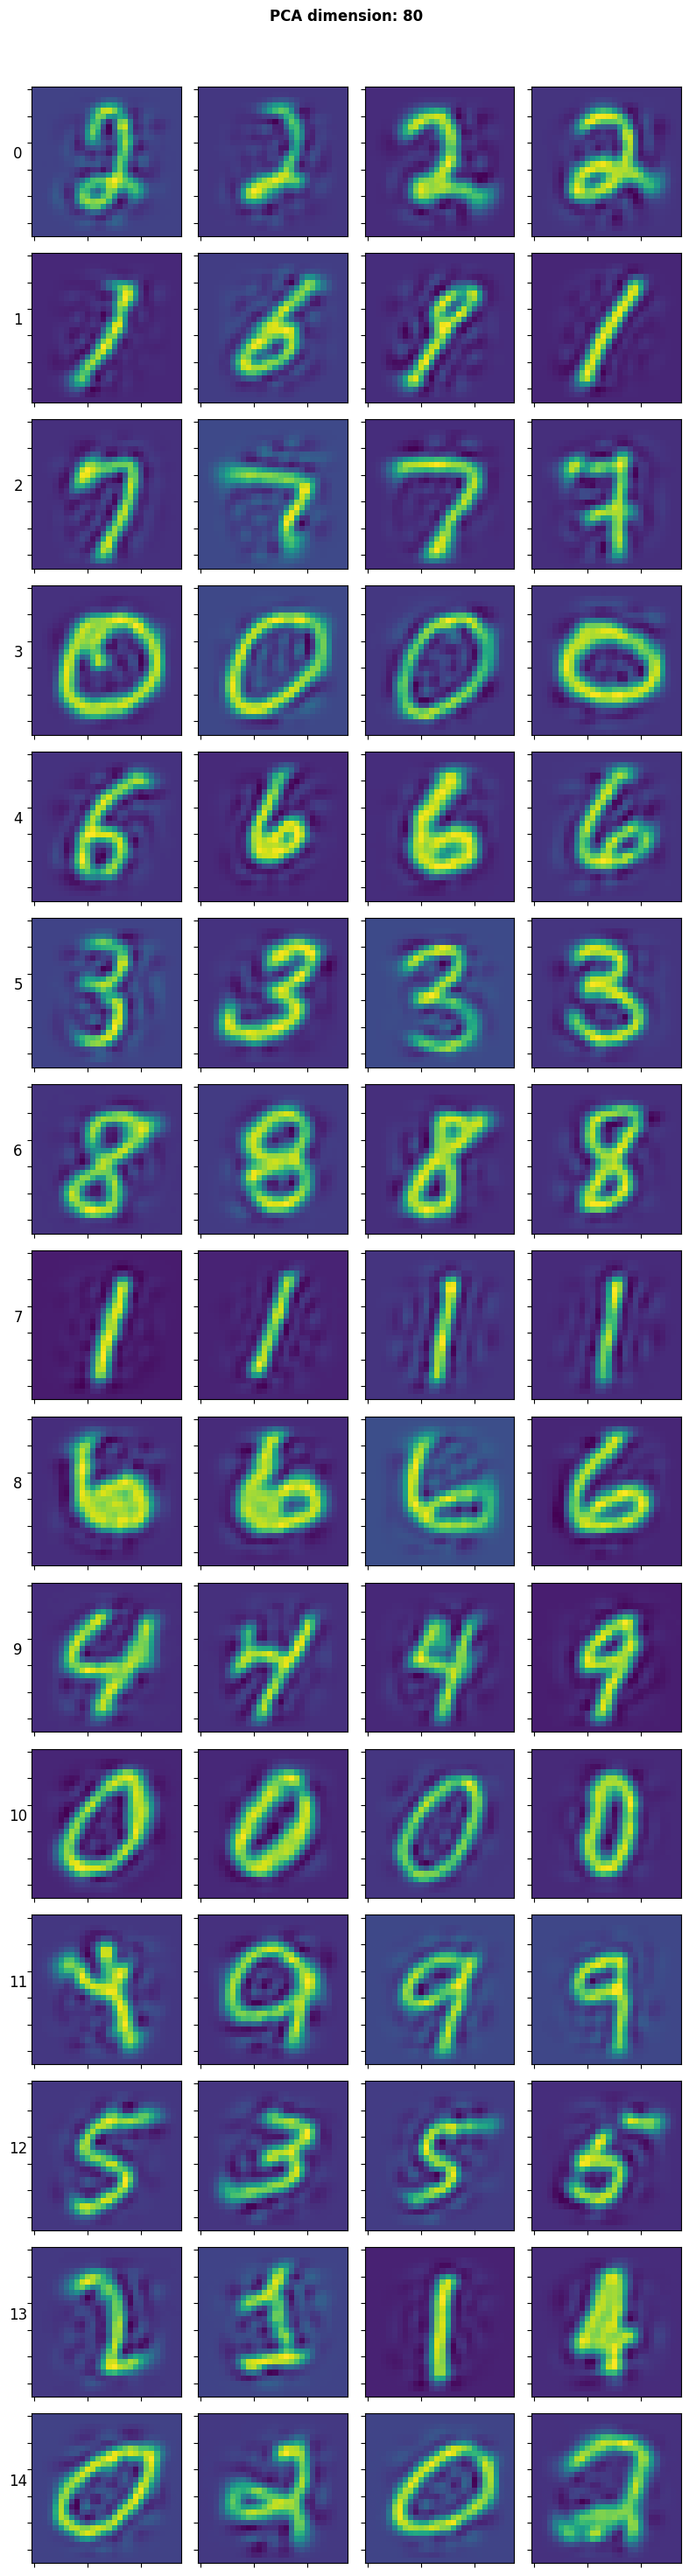

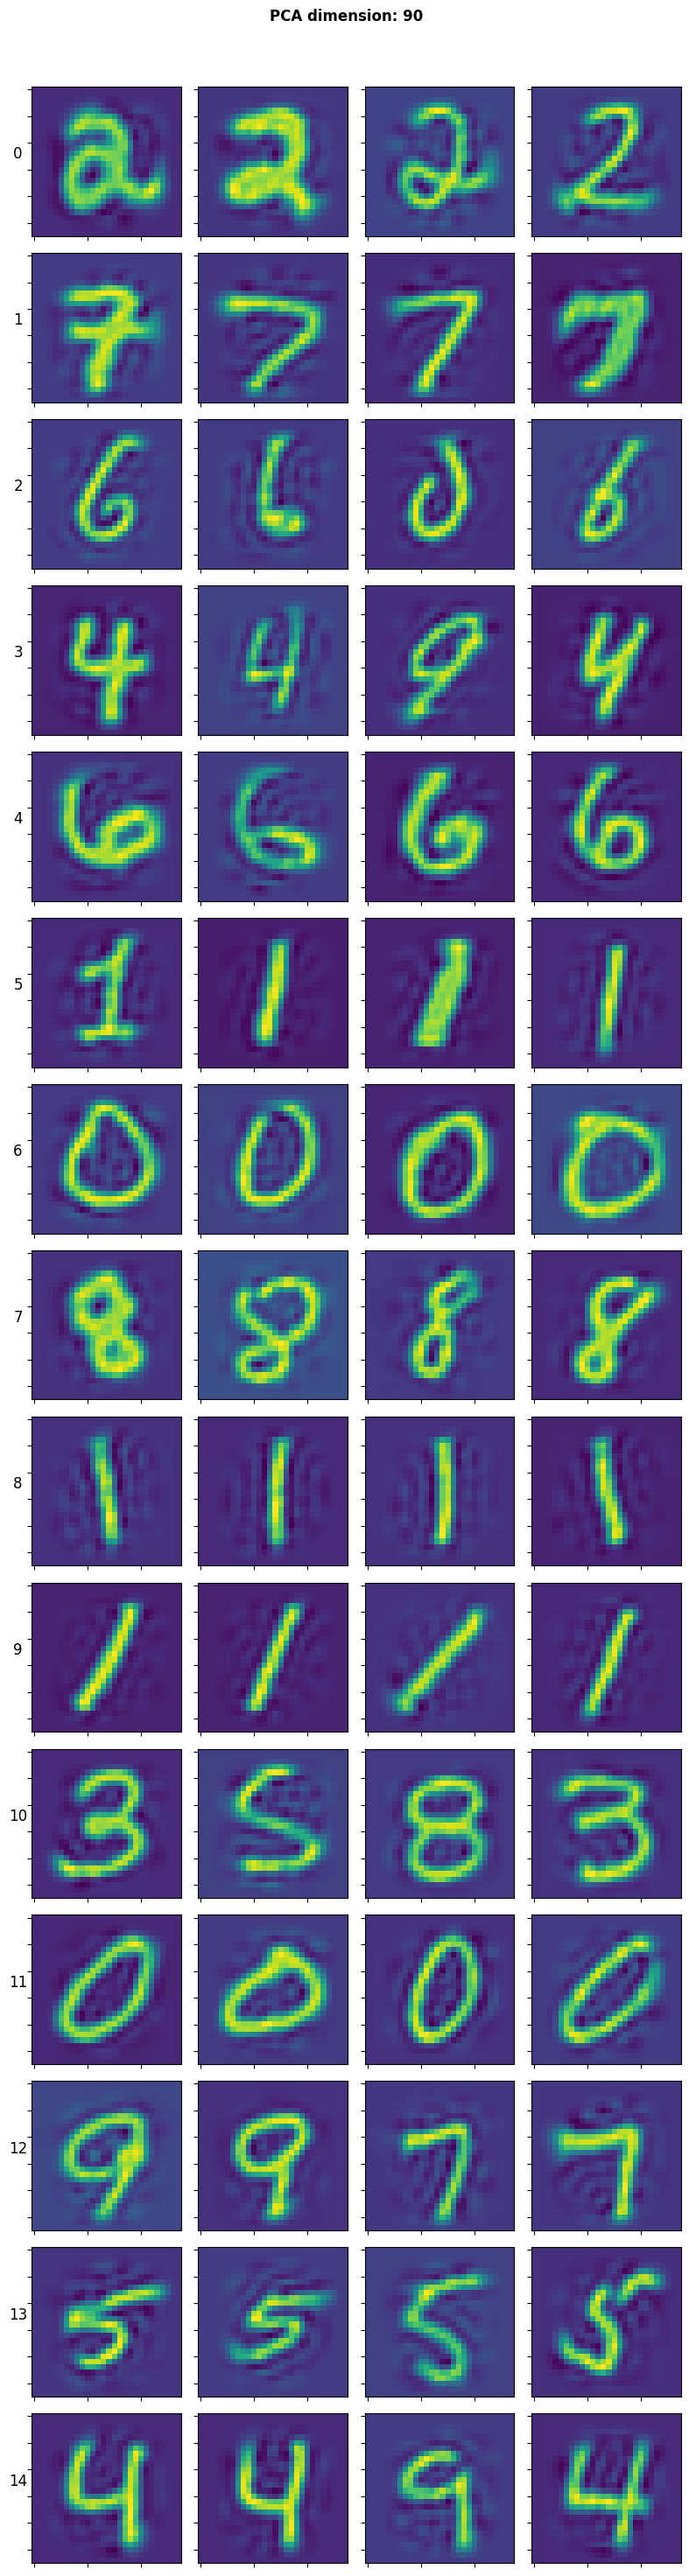

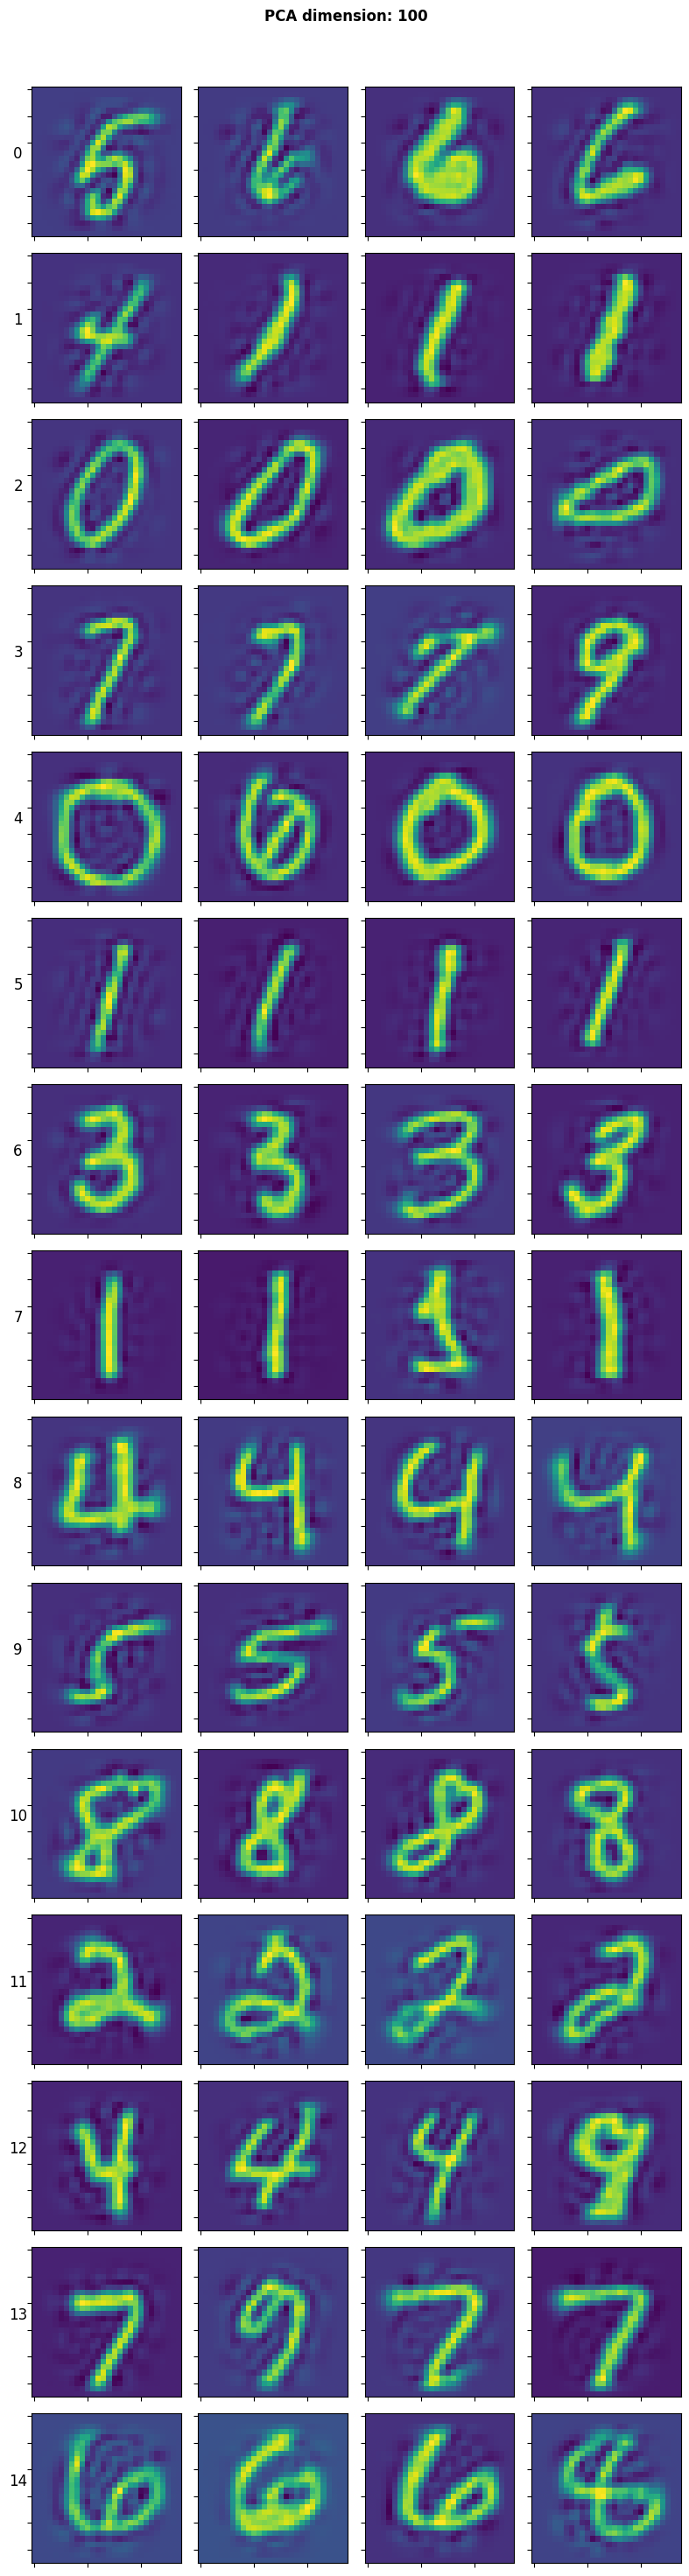

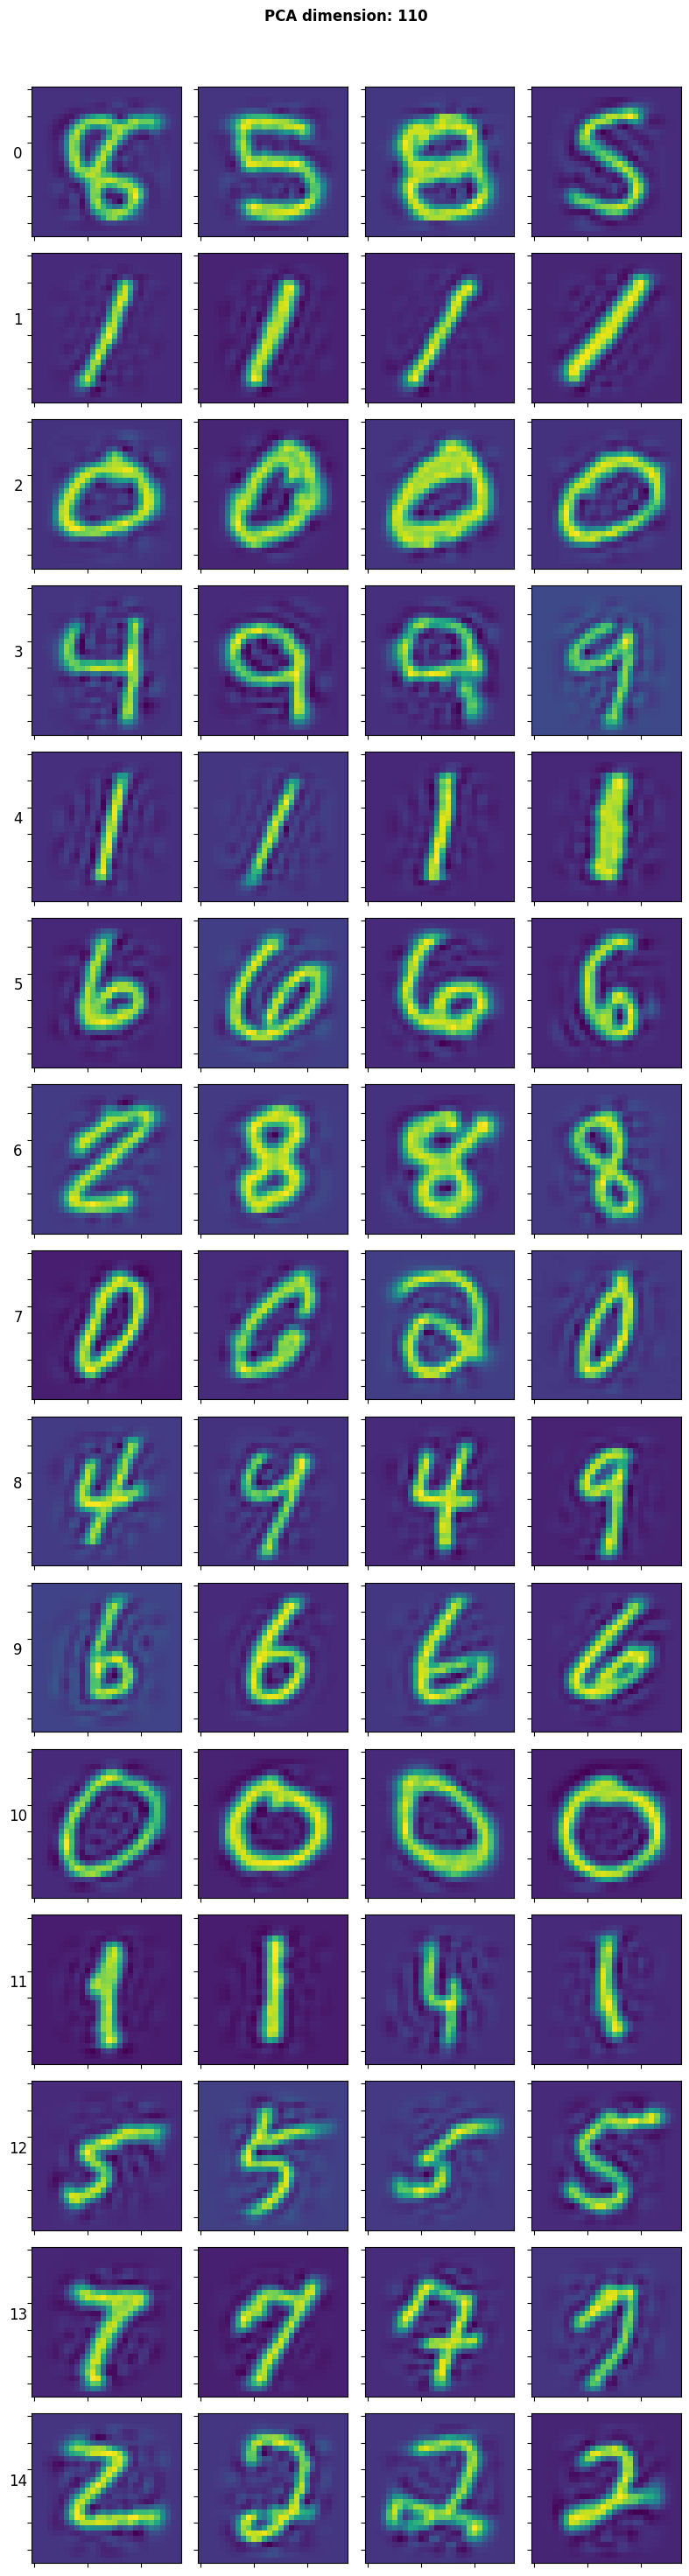

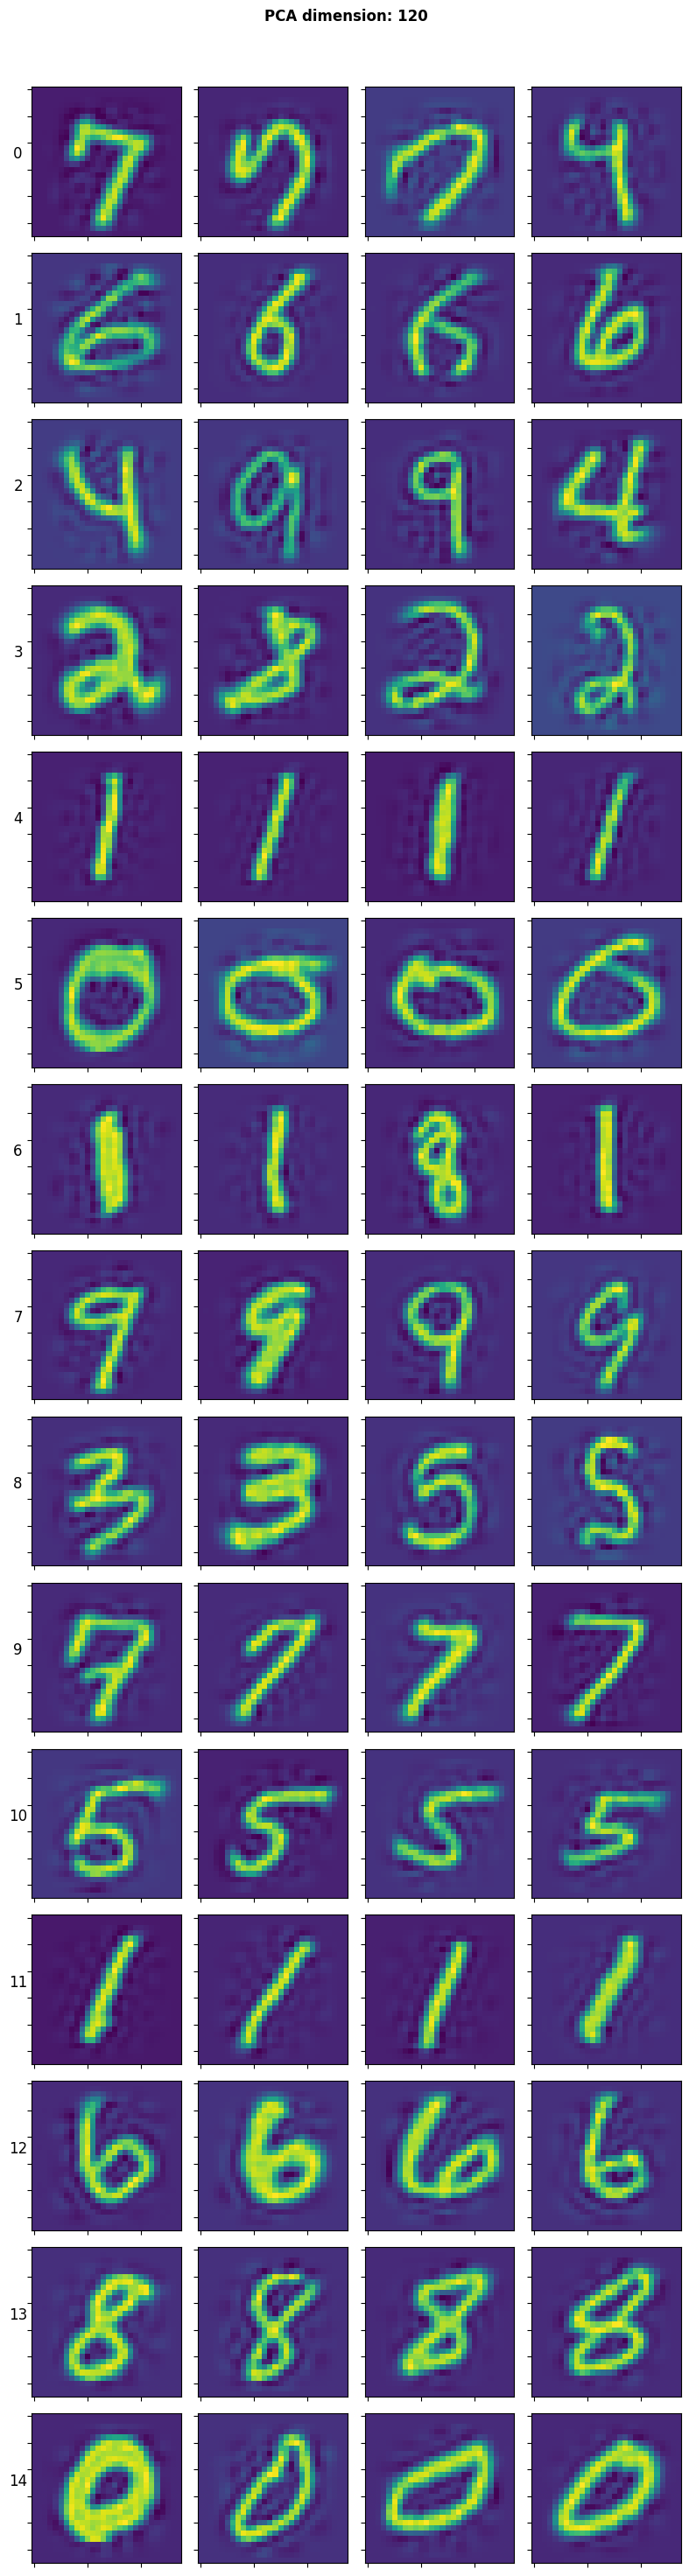

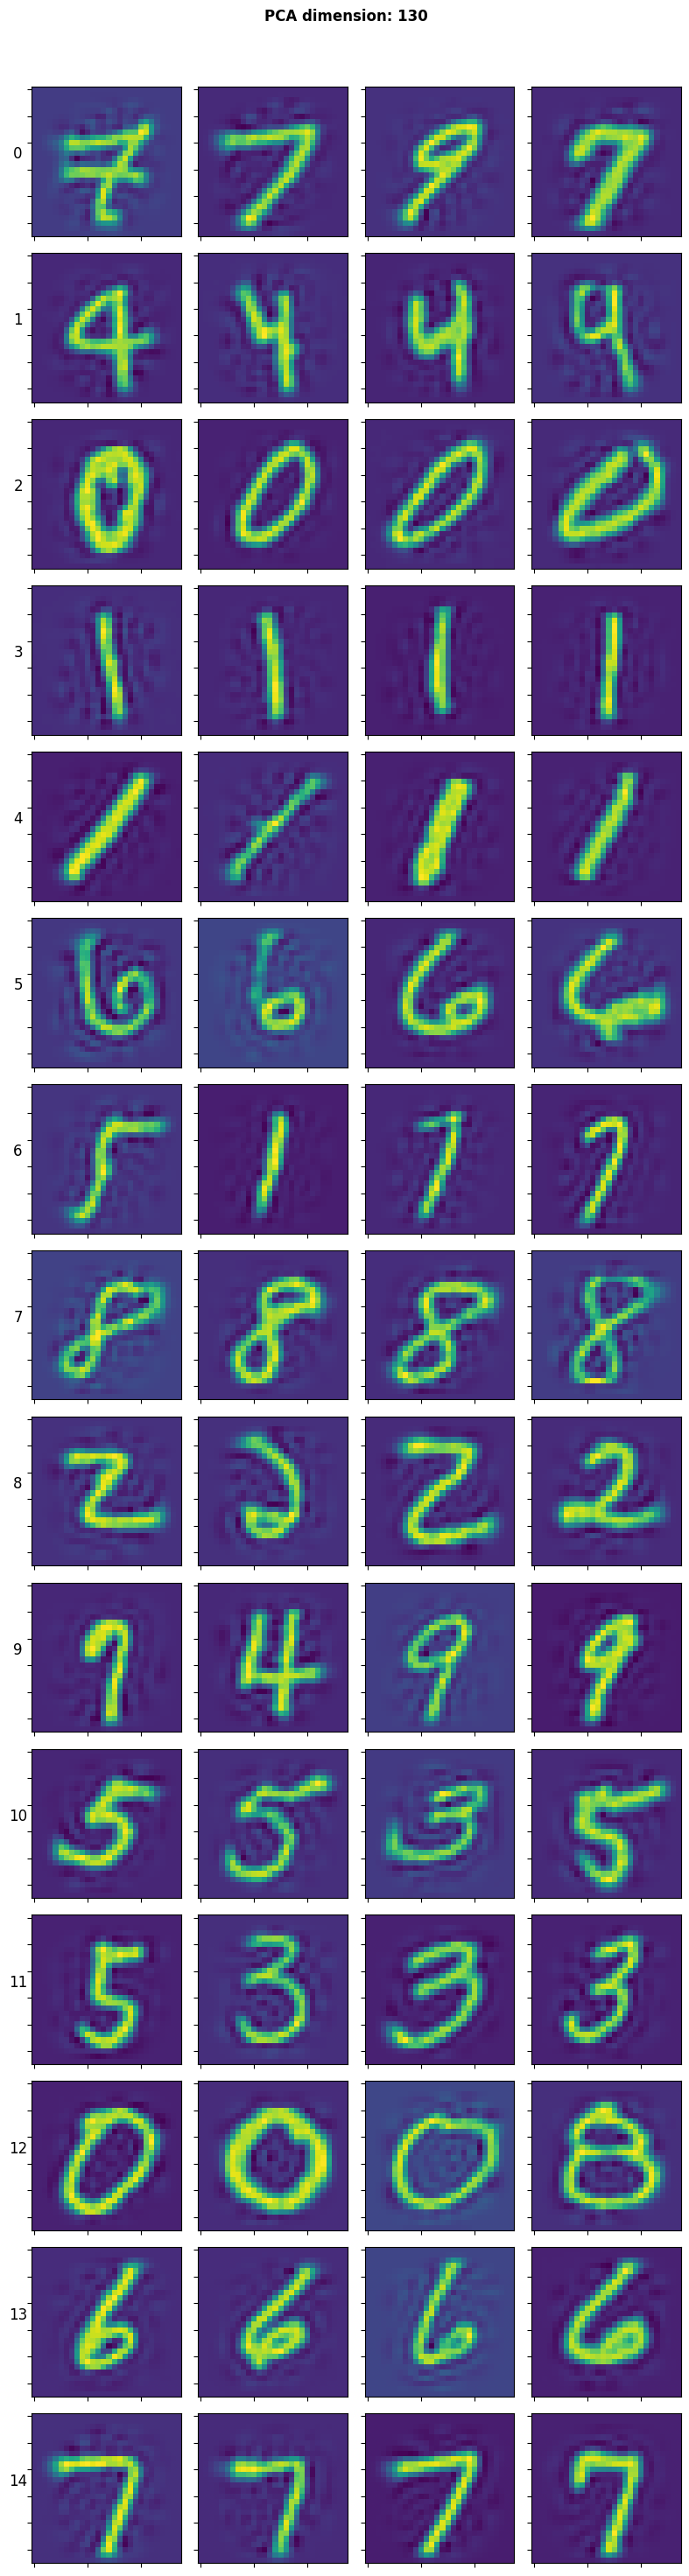

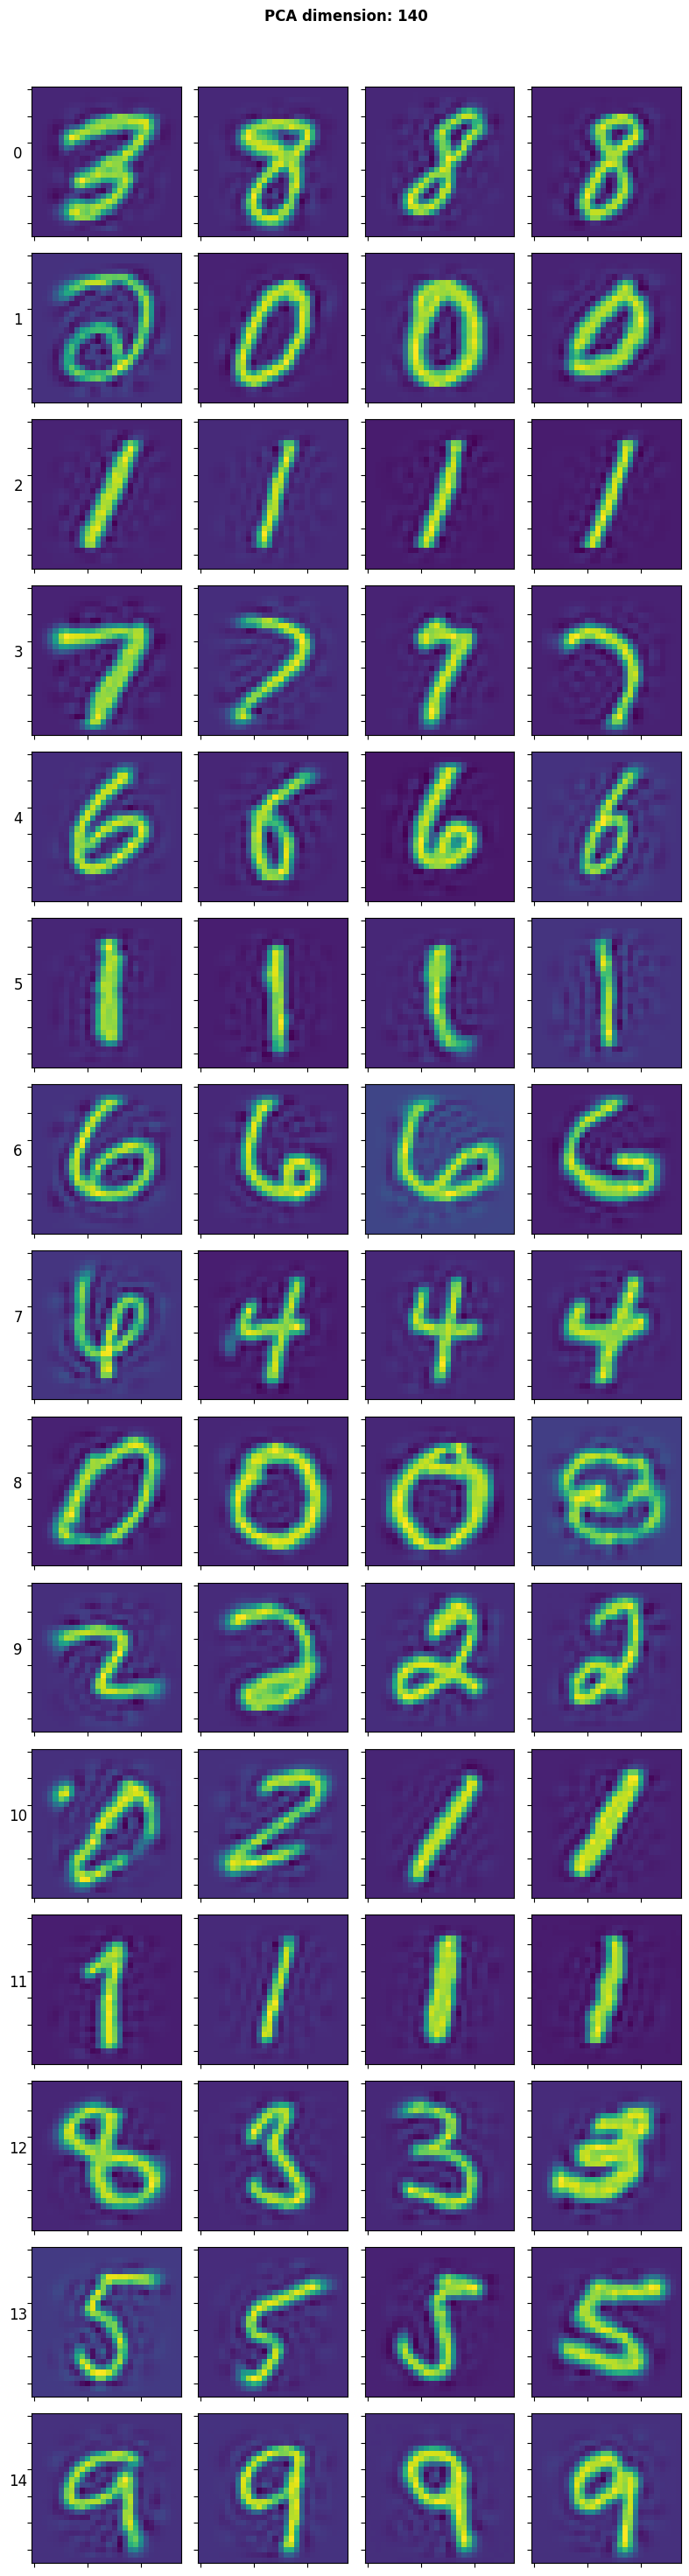

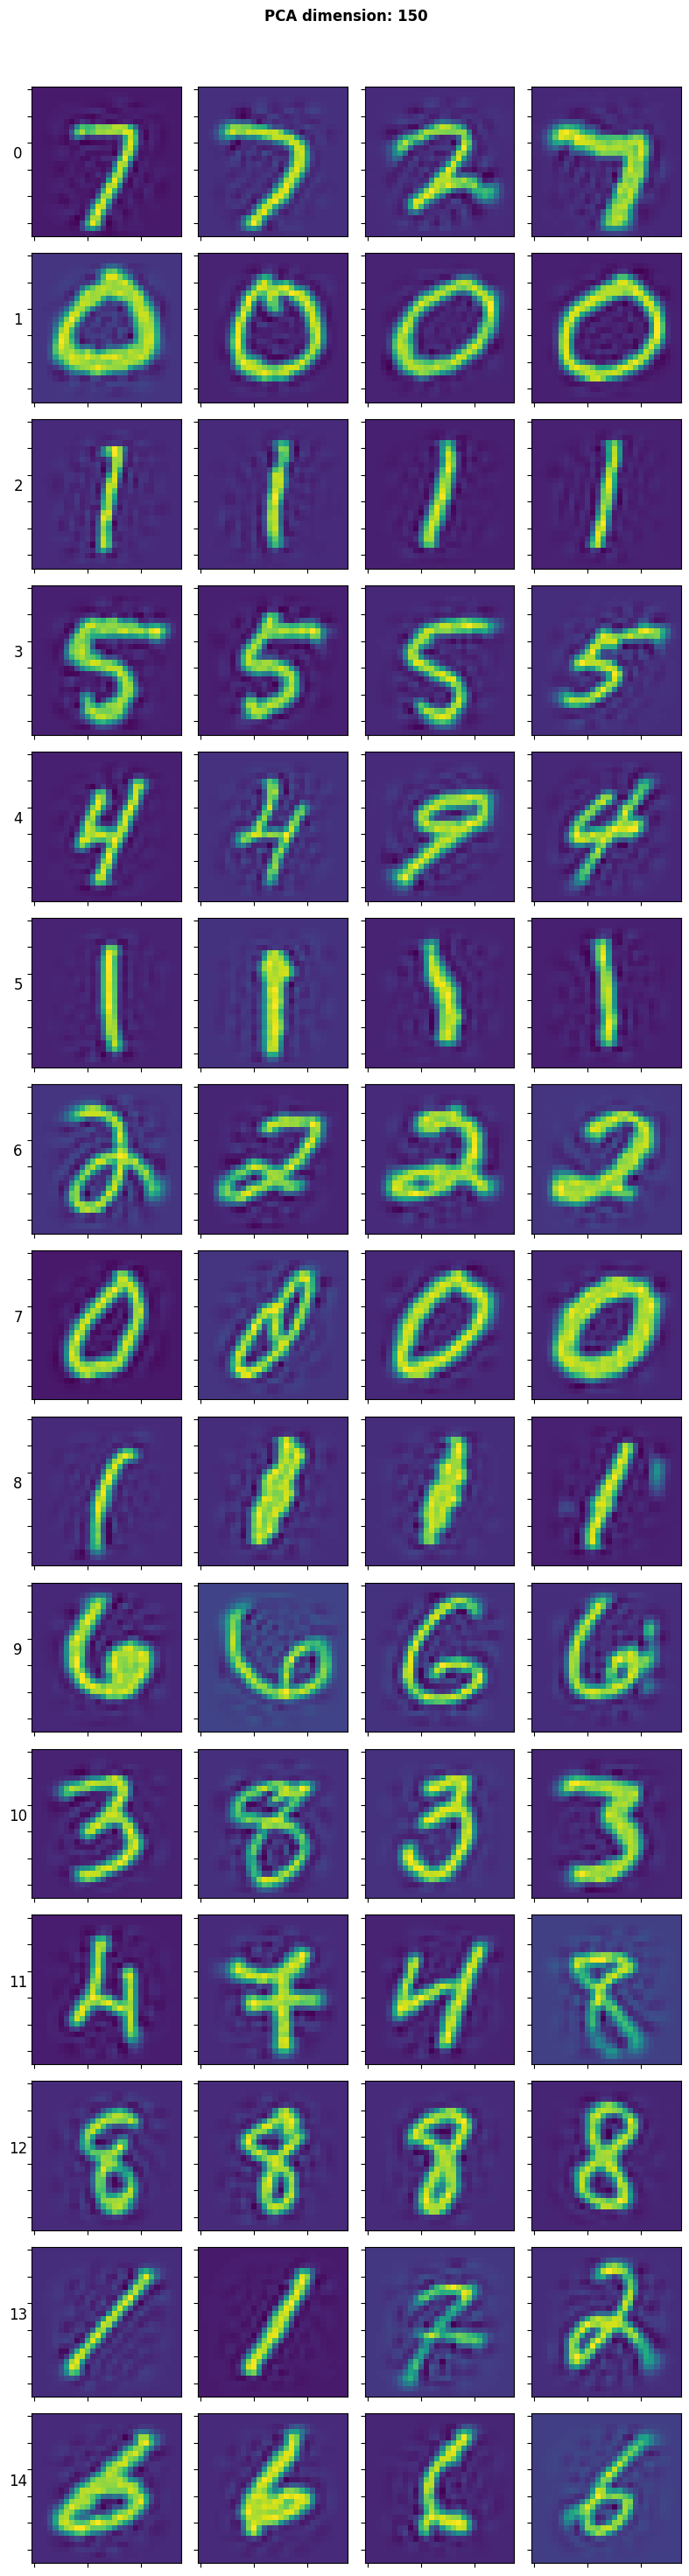

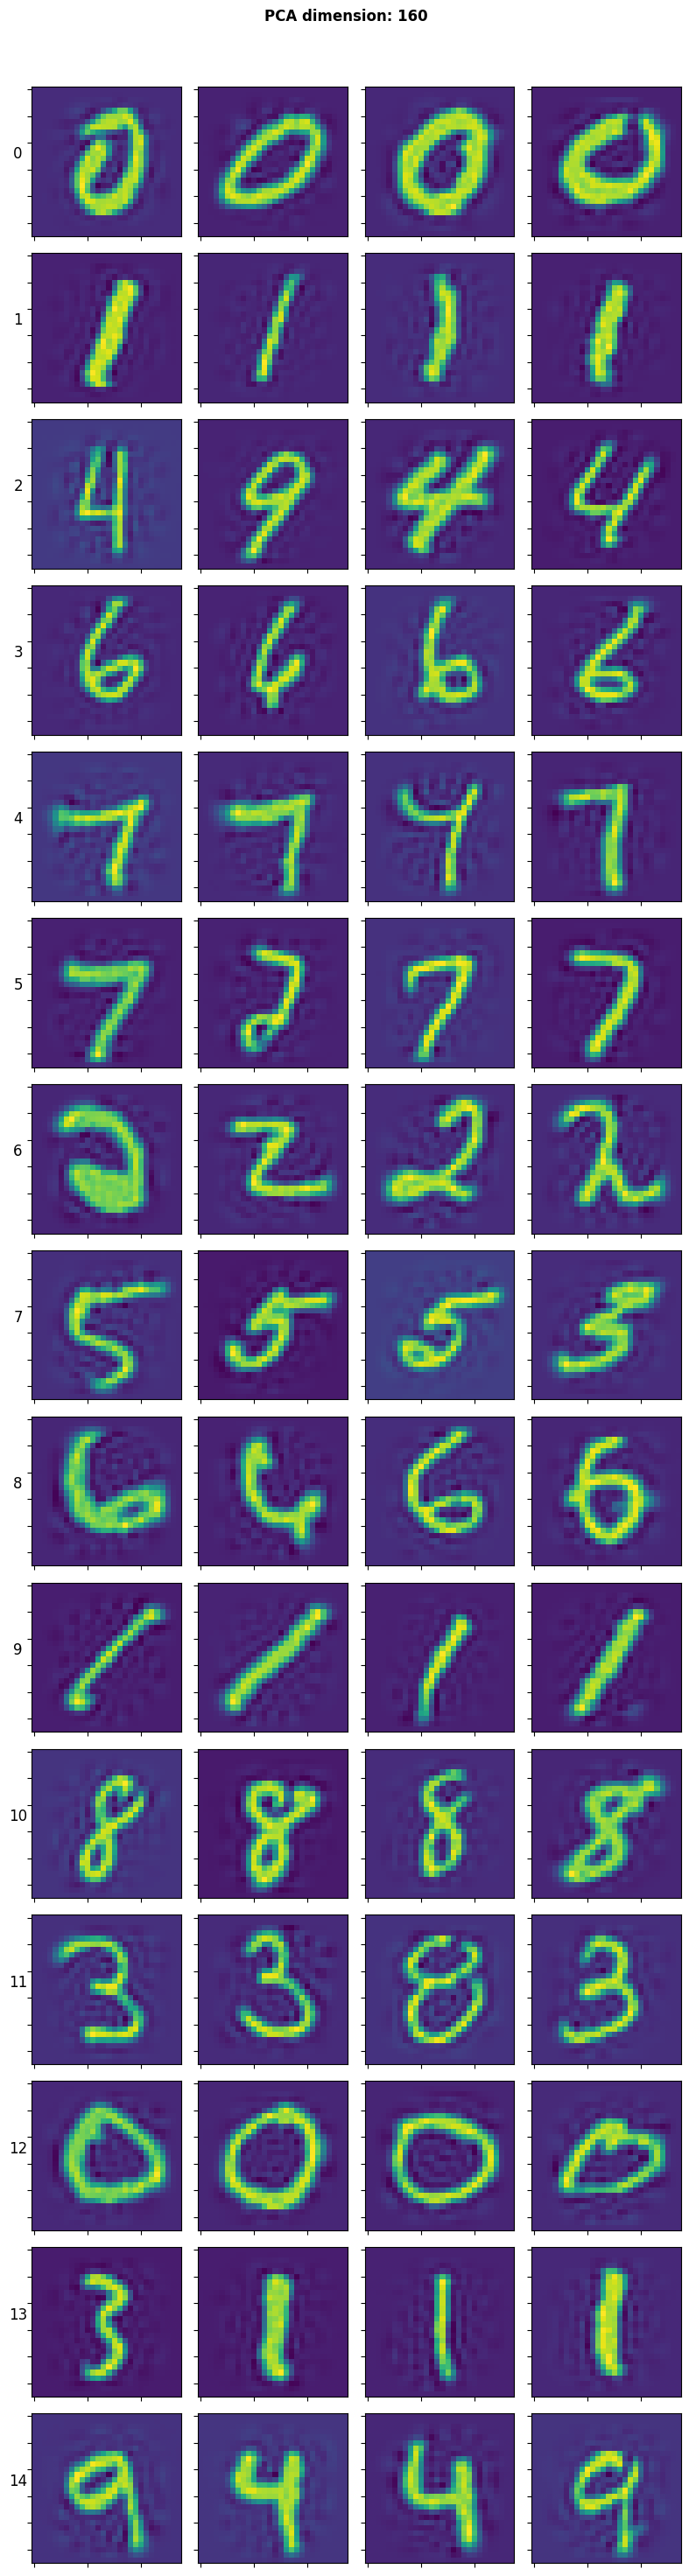

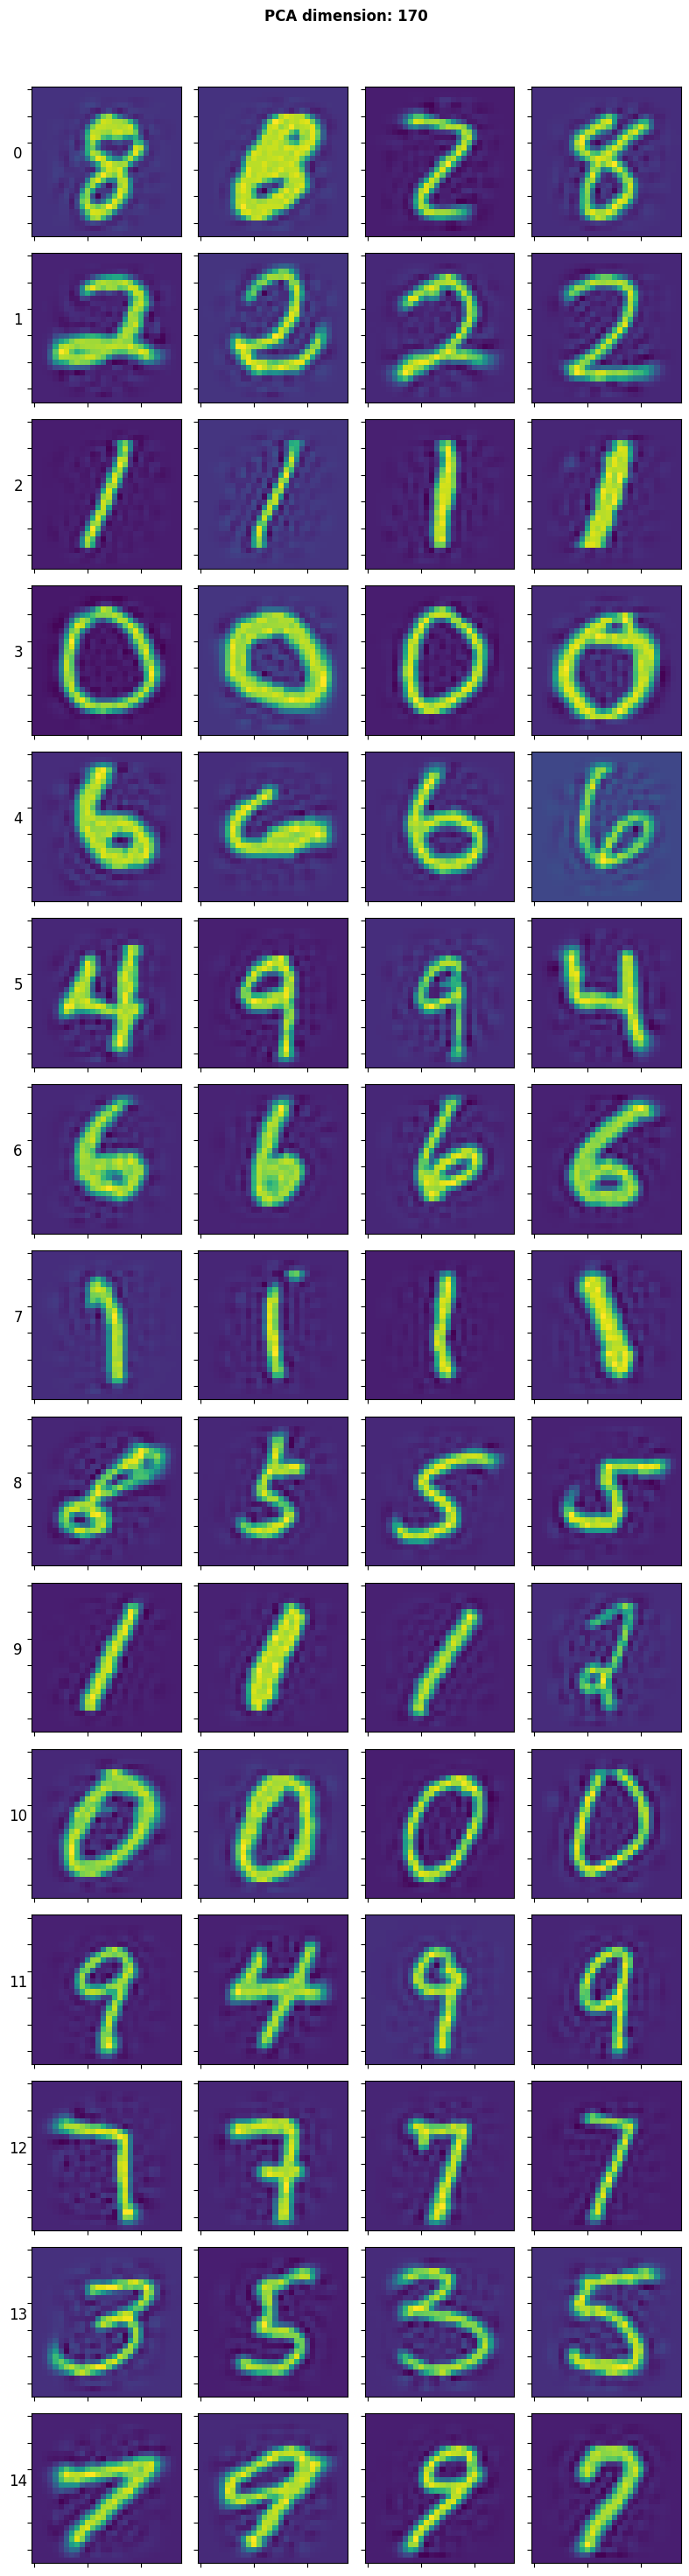

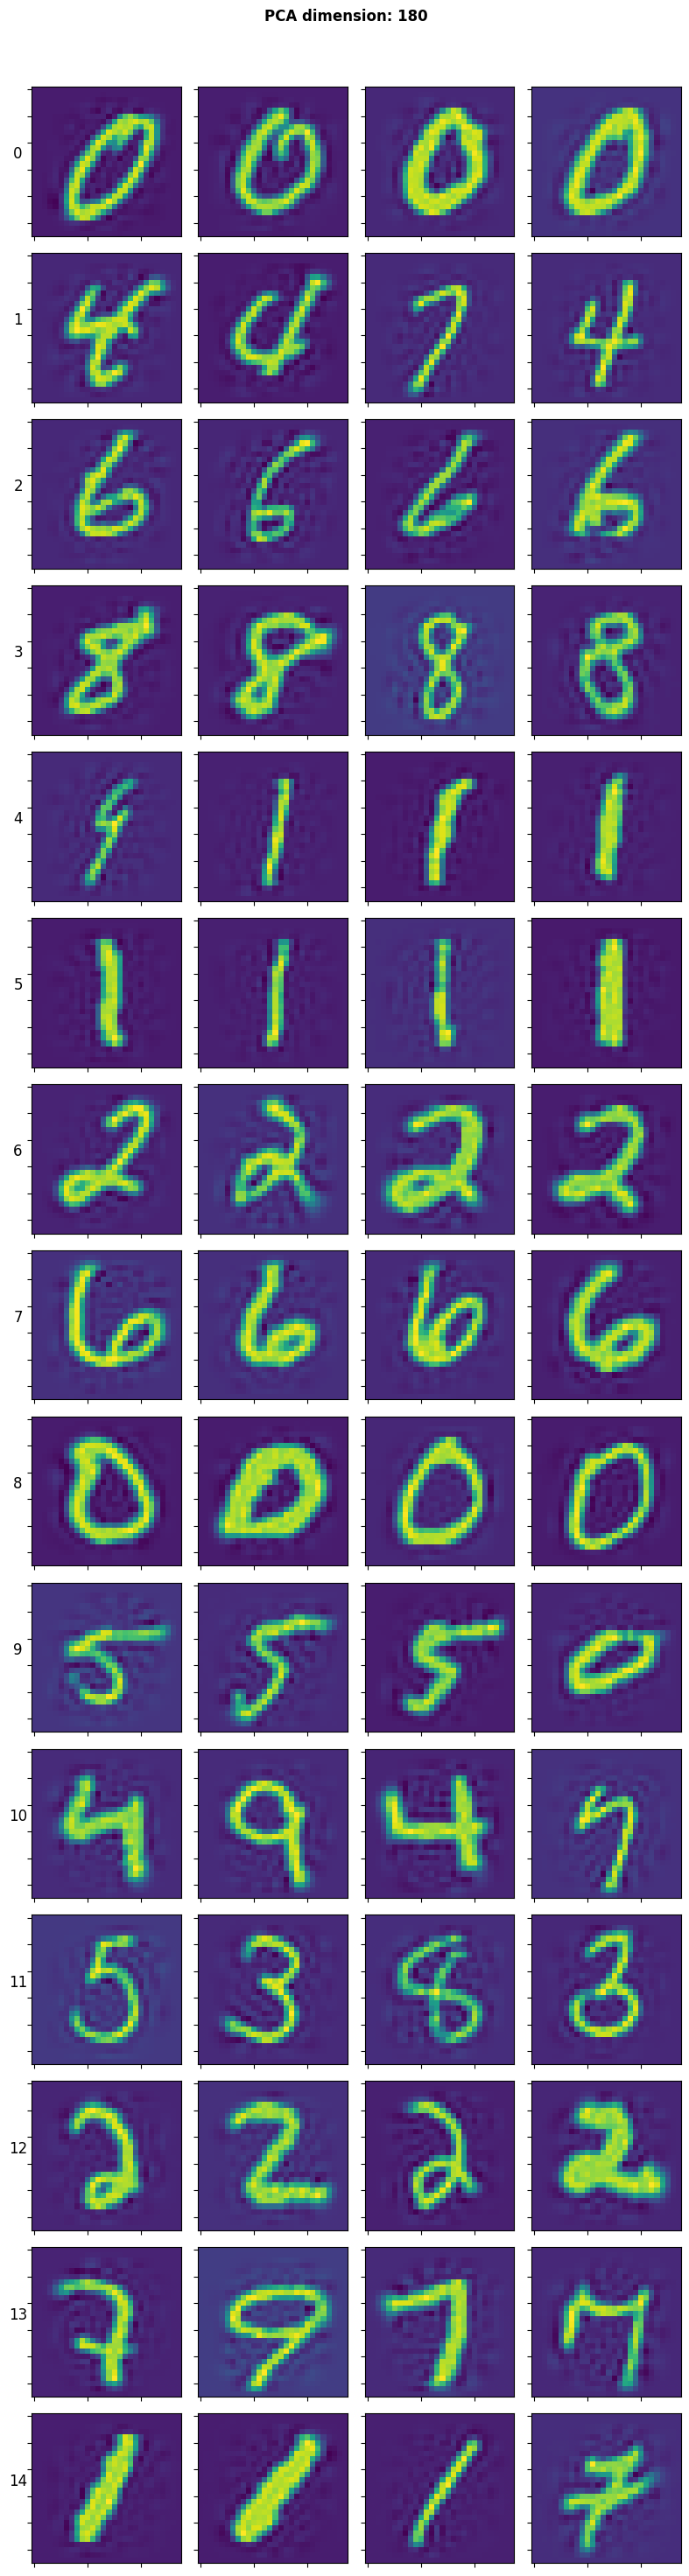

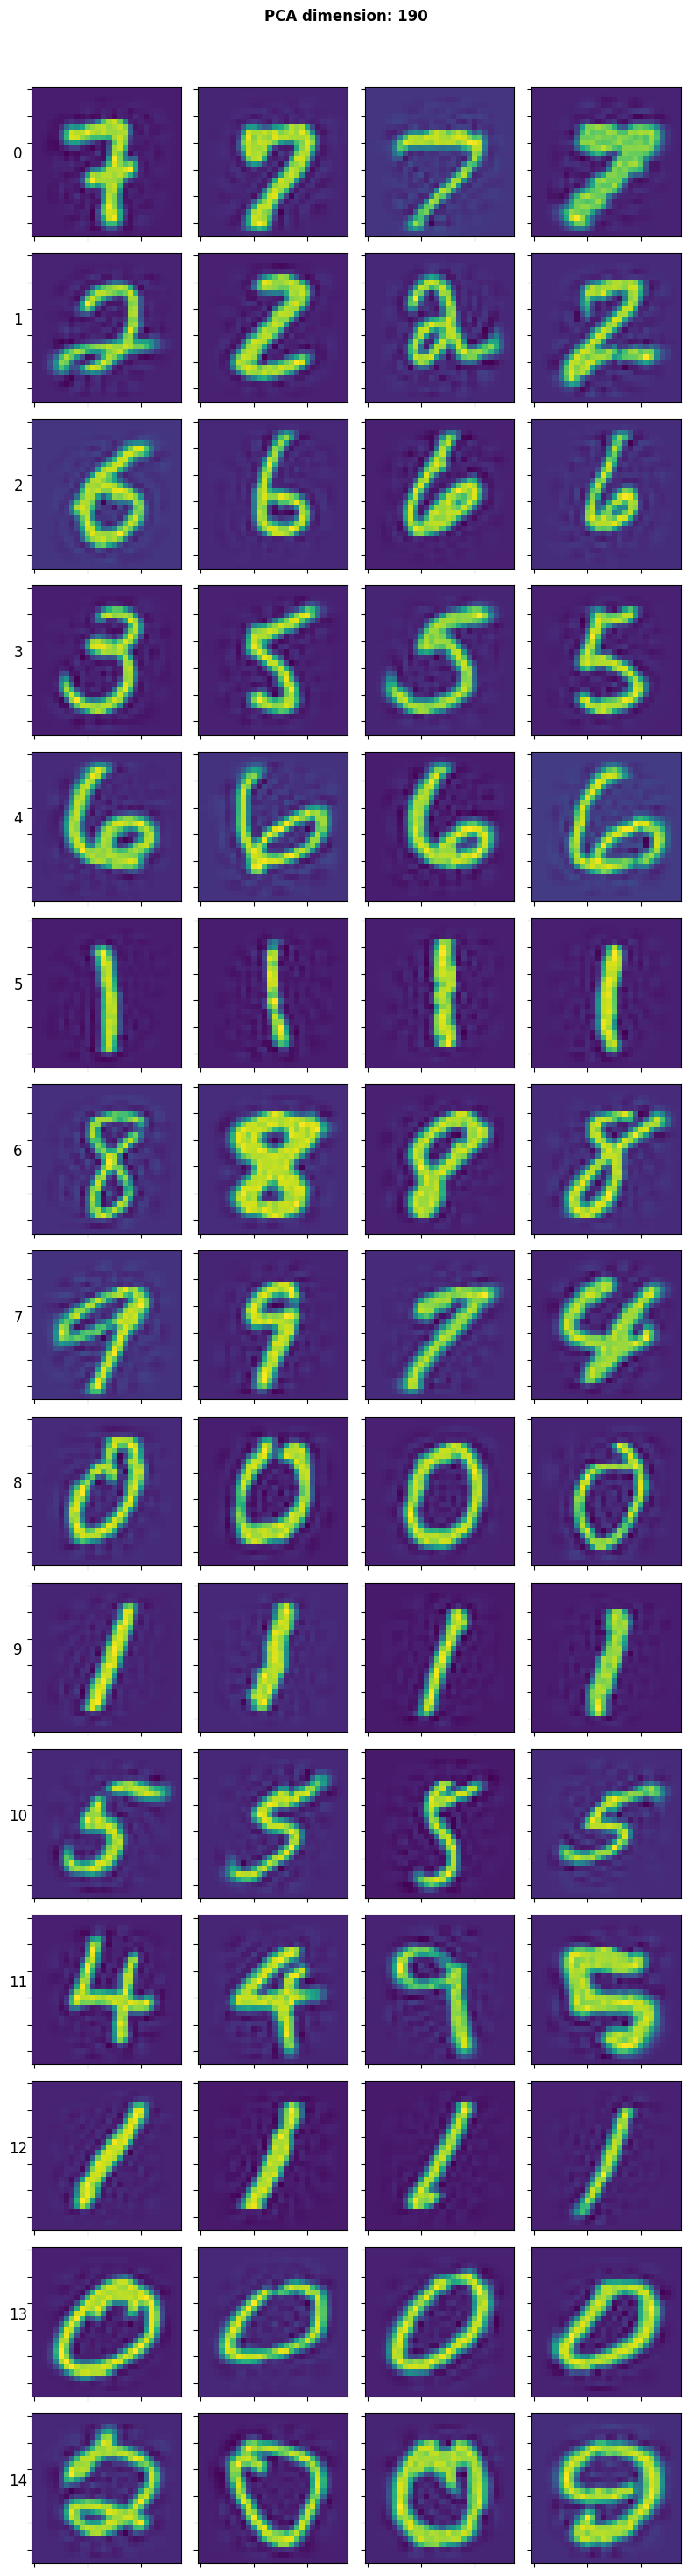

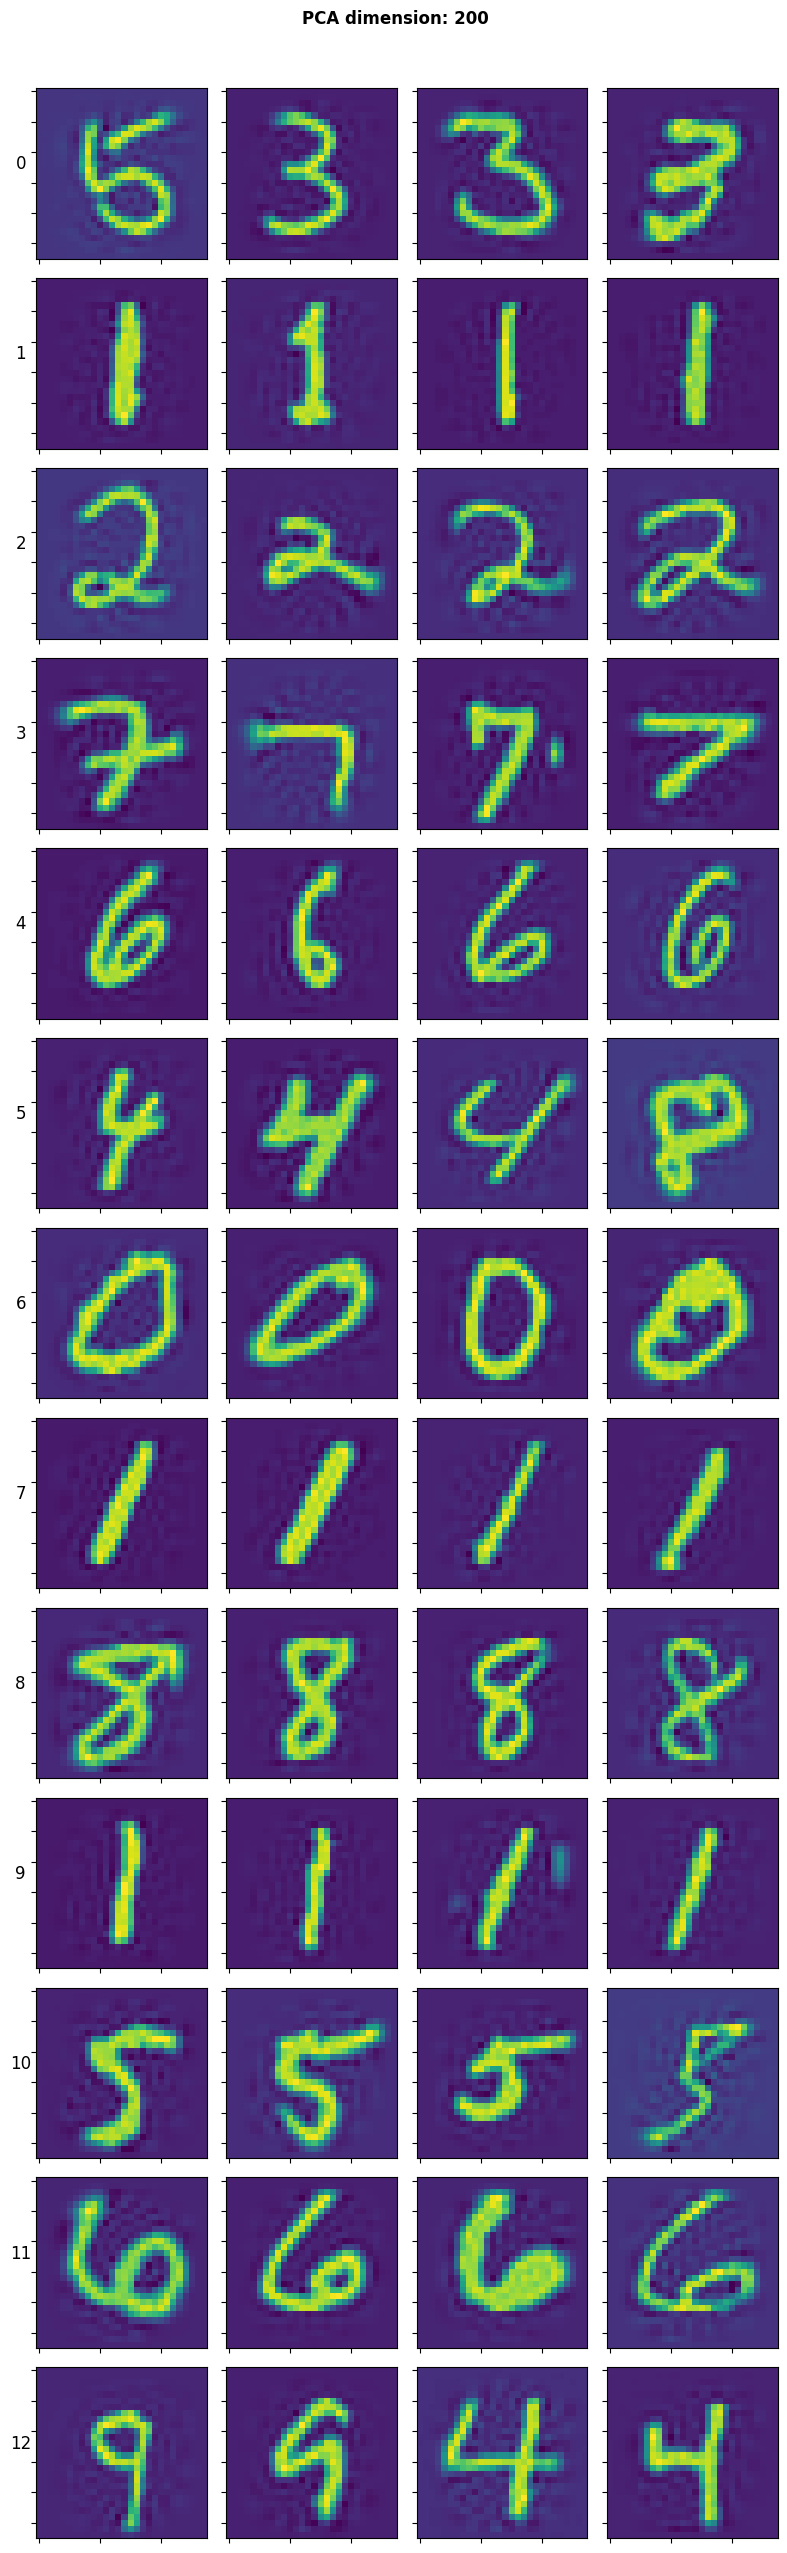

In [17]:
X_test, _ = load_PCA_test_sets(PCA_DIMENSIONS, DATASET_PERC)
i = 0

for pca_dim in PCA_DIMENSIONS:
    plot_images_per_cluster(X_test, pca_dim, labels[i], n_clusters[i], "NormalizedCut")
    i += 1